# Note:
- Data Wrangling / Pre-Processing:
    - Import all datasets from third notebook for data wrangling
        - remove duplicate features
        - engineer new features
            - Age Addition for the candidate and donor, including mean value from features that have data at registration and prior to transplant.
            - Consolidate nominal categories
- Export pickle files for further processing

In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv
import UserImputeFunctions as ui

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** Engineer Full'
RANDOM_STATE = 1776

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# initialize DataFrame
df_new = pd.DataFrame(columns=['column'])

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/3Clean_Heart.pkl")
df_label = pd.read_pickle("../Data/3Clean_Label.pkl")
df_can = pd.read_pickle("../Data/3Clean_CAN.pkl")
df_don = pd.read_pickle("../Data/3Clean_DON.pkl")
df_both = pd.read_pickle("../Data/3Clean_Both.pkl")
df_nominal = pd.read_pickle("../Data/3Clean_Nominal.pkl")
df_ordinal = pd.read_pickle("../Data/3Clean_Ordinal.pkl")
df_numeric = pd.read_pickle("../Data/3Clean_Numeric.pkl")
df_object = pd.read_pickle("../Data/3Clean_Object.pkl")
df_date = pd.read_pickle("../Data/3Clean_Date.pkl")
df_dict = pd.read_pickle("../Data/3Clean_Dictionary.pkl")
df_drop = pd.read_pickle("../Data/3Clean_Drop.pkl")
df_unknown = pd.read_pickle("../Data/3Clean_Unknown.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

### Feature Information

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Numeric Features: {df_numeric.shape[0]:,}")
print(f"Ordinal Features: {df_ordinal.shape[0]:,}")
print(f"Nominal Features: {df_nominal.shape[0]:,}")
print(f"Drop Features: {df_drop.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"Dictionary Features: {df_dict.shape[0]:,}")

Heart Dataset Rows: 27,494 & Columns: 261
Label Features: 15
Candidate Features: 139
Donor Features: 95
Date Features: 14
Both Features: 7
Object Features: 11
Numeric Features: 45
Ordinal Features: 13
Nominal Features: 179
Drop Features: 0
Unknown Features: 0
Dictionary Features: 302


In [4]:
# all label features
labelCols = df_label.column.to_list()

# display
df[labelCols].head()

,AcuteRejectionEpisode,AirwayDehiscencePostTransplant,StrokePostTransplant,PacemakerPostTransplant,DialysisPostDischarge,GraftFailStatus,GraftLifeSpanDay,LastFollowupNumber,GraftStatus,TransplantStatus,TransplantSurvivalDay,RecipientStatus,RejectionTreatmentWithinOneYear,FunctionalStatusFollowUp,LengthOfStay
0,No,No,No,No,Yes,Failure,329.0,999,No,Dead,329.0,Dead,No,"100% - Normal, no complaints, no evidence of disease",76.0
1,No,No,No,No,No,Success,2592.0,80,Yes,Alive,2592.0,Living,Missing,Unknown,10.0
2,No,No,No,No,No,Success,2913.0,80,Yes,Alive,2913.0,Living,No,Unknown,21.0
3,"Yes, at least one episode treated with anti-rejection agent",No,No,No,No,Failure,1225.0,999,No,Dead,1225.0,Dead,Yes,"30% - Severely disabled: hospitalization is indicated, death not imminent",32.0
4,No,No,No,No,No,Success,2785.0,80,Yes,Alive,2785.0,Living,No,Unknown,26.0


### Remove Unwanted Features

In [5]:
# all ordinal columns
removeCols = df_object.column.to_list()

# display
df[removeCols].head()

,VentricularDeviceTypeRegistration_CAN,VentricularDeviceTypeTransplant_CAN,VentricularDeviceBrandRegistration_CAN,VentricularDeviceBrandTransplant_CAN,PrimaryPaymentRegistration_CAN,PrimaryPaymentTransplant_CAN,DialysisTypeRegistration_CAN,CancerSite_DON,OtherMedsText1_DON,OtherMedsText2_DON,OtherMedsText3_DON
0,Lvad+Rvad,Lvad+Rvad,CentriMag (Thoratec/Levitronix),CentriMag (Thoratec/Levitronix),Public insurance - Medicaid,Public insurance - Medicaid,No dialysis,NO,"ZOSYN, VANCOMYCIN","KCL,","DOPAMINE, VASOPRESSIN,"
1,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicare FFS (Fee for Service),Public insurance - Medicare FFS (Fee for Service),No dialysis,NO,"ANCEF, FENTANYL, VERSED,LASIX",NaN,NaN
2,None,None,Missing,Missing,Private insurance,Private insurance,No dialysis,NO,"ZOSYN, VANCOMYCIN","AMPHOTERICIN, BETADINE",ZANTAC
3,Lvad+Rvad,Lvad,CentriMag (Thoratec/Levitronix),Heartmate II,Public insurance - Medicare & Choice,Private insurance,No dialysis,"SKIN - SQUAMOUS, BASAL CELL","KCL, VANCO, MAG, ZOSYN","D50, DOPAMINE, DIFLUCAN",NaN
4,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicare & Choice,Public insurance - Medicare & Choice,No dialysis,NO,"ROCURONIUM, VECURONIUM","ZOSYN, CIPROFLOXACIN","BUMETIDE, ANCEF"


In [6]:
# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.house_keeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 6 row(s) from df_can DataFrame.
Remove 4 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 11 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['CancerSite_DON', 'DialysisTypeRegistration_CAN', 'OtherMedsText1_DON', 'OtherMedsText2_DON', 'OtherMedsText3_DON', 'PrimaryPaymentRegistration_CAN', 'PrimaryPaymentTransplant_CAN', 'VentricularDeviceBrandRegistration_CAN', 'VentricularDeviceBrandTransplant_CAN', 'VentricularDeviceTypeRegistration_CAN', 'VentricularDeviceTypeTransplant_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 27,494 & columns: 261
Total Row(s) & Column(s) After Removing Column(s): 27,494 & columns: 250


### ListingYear

In [7]:
uf.category_contingency(df, 'ListingYear', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
ListingYear,,,,,,,,
2011,664.0,1273.0,47.0,0.0,34.0,2018.0,32.903865,63.082260
2012,643.0,1438.0,32.0,0.0,35.0,2148.0,29.934823,66.945996
2013,620.0,1568.0,38.0,0.0,31.0,2257.0,27.470093,69.472751
2014,576.0,1791.0,26.0,0.0,26.0,2419.0,23.811492,74.038859
2015,512.0,1963.0,28.0,0.0,23.0,2526.0,20.269200,77.711797
2016,496.0,2112.0,13.0,0.0,17.0,2638.0,18.802123,80.060652
2017,436.0,2191.0,5.0,0.0,12.0,2644.0,16.490166,82.866868
2018,357.0,2363.0,4.0,3.0,24.0,2751.0,12.977099,85.896038
2019,358.0,2494.0,1.0,12.0,8.0,2873.0,12.460842,86.808214


#### Plot

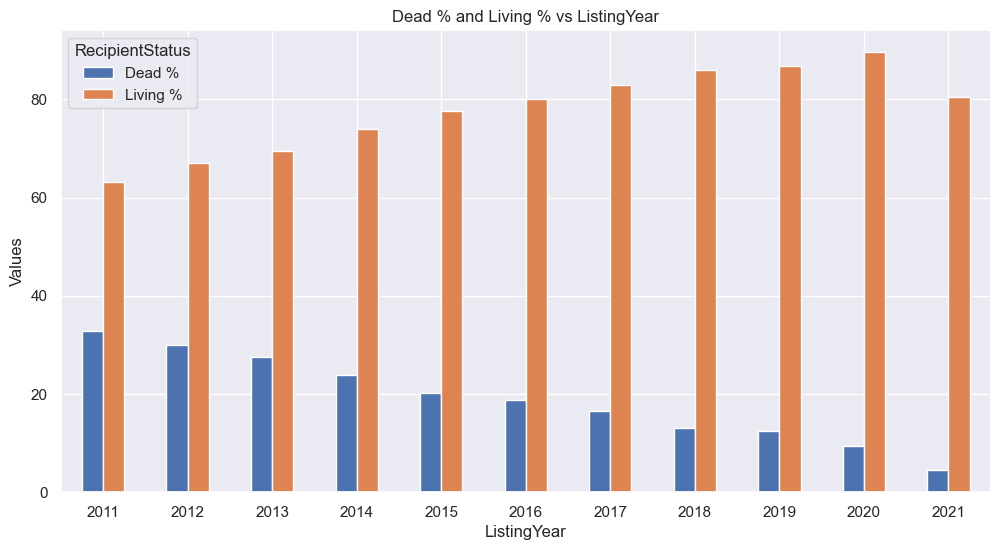

In [8]:
# get table into DataFrame
data = uf.category_contingency(df, 'ListingYear', 'RecipientStatus')
# exclude the last row
data = data.iloc[:-1]

# 'Dead %' or 'Living %'
data = data[['Dead %', 'Living %']]

# Plotting the bar plot
data.plot(kind='bar', figsize=(12,6))
plt.title('Dead % and Living % vs ListingYear')
plt.xlabel('ListingYear')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [9]:
# initialize list
removeCols = df_date.column.to_list()

# remove date features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.house_keeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 7 row(s) from df_can DataFrame.
Remove 3 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 14 row(s) from df_date DataFrame.

Removed Features: ['AdmissionDate_CAN', 'AdmissionDate_DON', 'AllocationBeginDate_CAN', 'CenterDischargeDate_CAN', 'InitialWaitListDate_CAN', 'ListingYear', 'OrganRecoveryDate_DON', 'ReferralDate_DON', 'RemovalWaitListDate_CAN', 'StatusDate_CAN', 'TransplantDate_CAN', 'ValidationDateTCR_CAN', 'ValidationDateTCR_DDR', 'ValidationDateTRR_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 27,494 & columns: 250
Total Row(s) & Column(s) After Removing Column(s): 27,494 & columns: 236


### Wrangle Data

#### Remove Date & NaNs > 40%

In [10]:
# get NaNs
NaNsDF = uf.percentage_null(df)

# remove NaNs
removeCols = NaNsDF.index[NaNsDF.percentage > 40].to_list()

# append text fields
removeCols.extend(df_date.column.to_list())

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.house_keeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 6 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 1 row(s) from df_nominal DataFrame.
Remove 5 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['CPRA_Peak_CAN', 'CPRA_Recent_CAN', 'Class1PRA_TransplantPercentage_CAN', 'Class2PRA_TransplantPercentage_CAN', 'PriorCardiacSurgeryTypeText_CAN', 'TotalSerumAlbuminRegistration_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 27,494 & columns: 236
Total Row(s) & Column(s) After Removing Column(s): 27,494 & columns: 230


#### Numerical Features

In [11]:
print(sorted(df_numeric.column.to_list()))

['Age_CAN', 'Age_DON', 'Age_Listing_CAN', 'BMI_CAN', 'BMI_DON', 'BloodPH_DON', 'BloodUreaNitrogenLevel_DON', 'CreatinineRegistration_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'DistanceFromDonorHospitaltoTXCenter', 'GraftLifeSpanDay', 'HeightCm_CAN', 'HeightCm_DON', 'Hematocrit_DON', 'HemodynamicsRegistration_CO_CAN', 'HemodynamicsRegistration_PA_DIA_CAN', 'HemodynamicsRegistration_PA_MN_CAN', 'HemodynamicsRegistration_PCW_CAN', 'HemodynamicsRegistration_SYS_CAN', 'HemodynamicsTransplant_CO_CAN', 'HemodynamicsTransplant_PA_DIA_CAN', 'HemodynamicsTransplant_PA_MN_CAN', 'HemodynamicsTransplant_PCW_CAN', 'HemodynamicsTransplant_SYS_CAN', 'IschemicTimeHour_DON', 'LV_EjectionFractionPercent_DON', 'LastFollowupNumber', 'LengthOfStay', 'Level_SGOT_ALT_DON', 'Level_SGOT_AST_DON', 'LungPO2_DON', 'LungPO2_FIO2_DON', 'OrganRecovery_PCO2_DON', 'TerminalTotalBilirubin_DON', 'TotalBilirubinTransplant_CAN', 'TotalDayWaitList_CAN', 'TransplantSurvivalDay', 'WeightKg_CAN', 'WeightKg_DON']


##### [Age](https://www.sciencedirect.com/science/article/abs/pii/S105324989800059X)
- Remove:
    - Age_Listing_CAN 

In [12]:
# examine features
features = uf.get_feature_list(df, 'Age_')

                   count       mean        std   min   25%   50%   75%   max
Age_CAN          27494.0  53.411872  12.903775  18.0  46.0  56.0  63.0  79.0
Age_DON          27494.0  32.143449  10.943097   8.0  23.0  31.0  40.0  72.0
Age_Listing_CAN  27494.0  52.881392  12.938239  12.0  46.0  56.0  63.0  78.0

:::: NaN Count:
Age_CAN            0
Age_DON            0
Age_Listing_CAN    0


In [13]:
# create new feature
df['Age_Addition'] = df.Age_CAN + df.Age_DON + df.Age_Listing_CAN
df['Age_Mean_CAN'] = (df.Age_CAN + df.Age_Listing_CAN) / 2

# initialize list
new = ['Age_Addition', 'Age_Mean_CAN']

# update dataframe
df_numeric = uf.insert_into_dataframe(df_numeric, new)
df_new = uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)
df_drop = uf.insert_into_dataframe(df_drop, features)

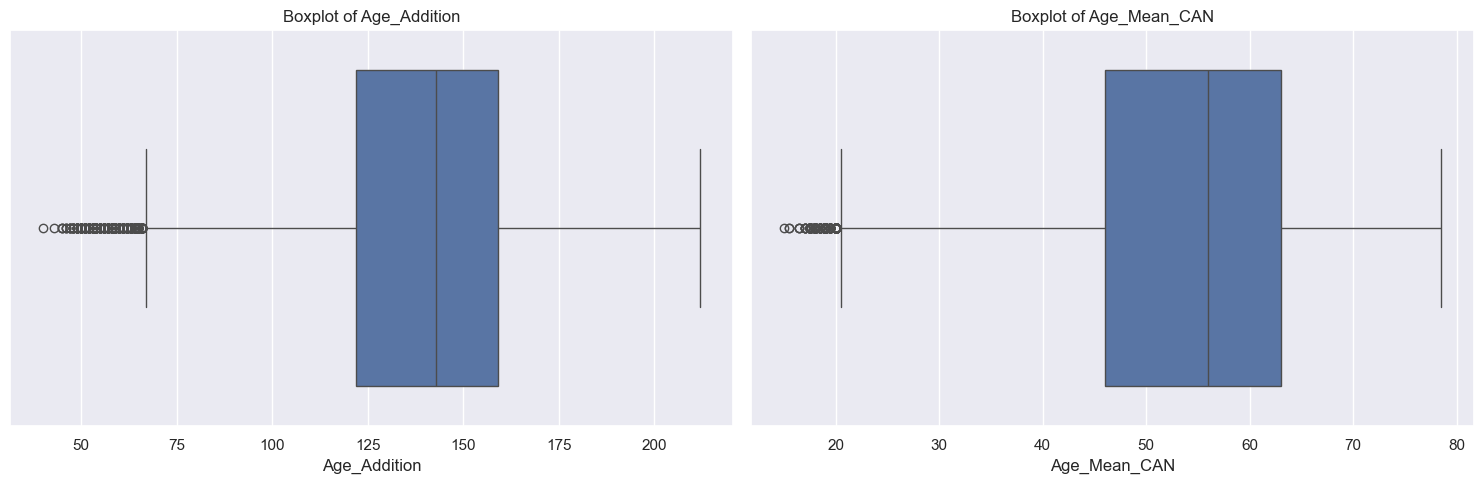

In [14]:
# boxplot
uv.plot_box(df, new, orientation='h')

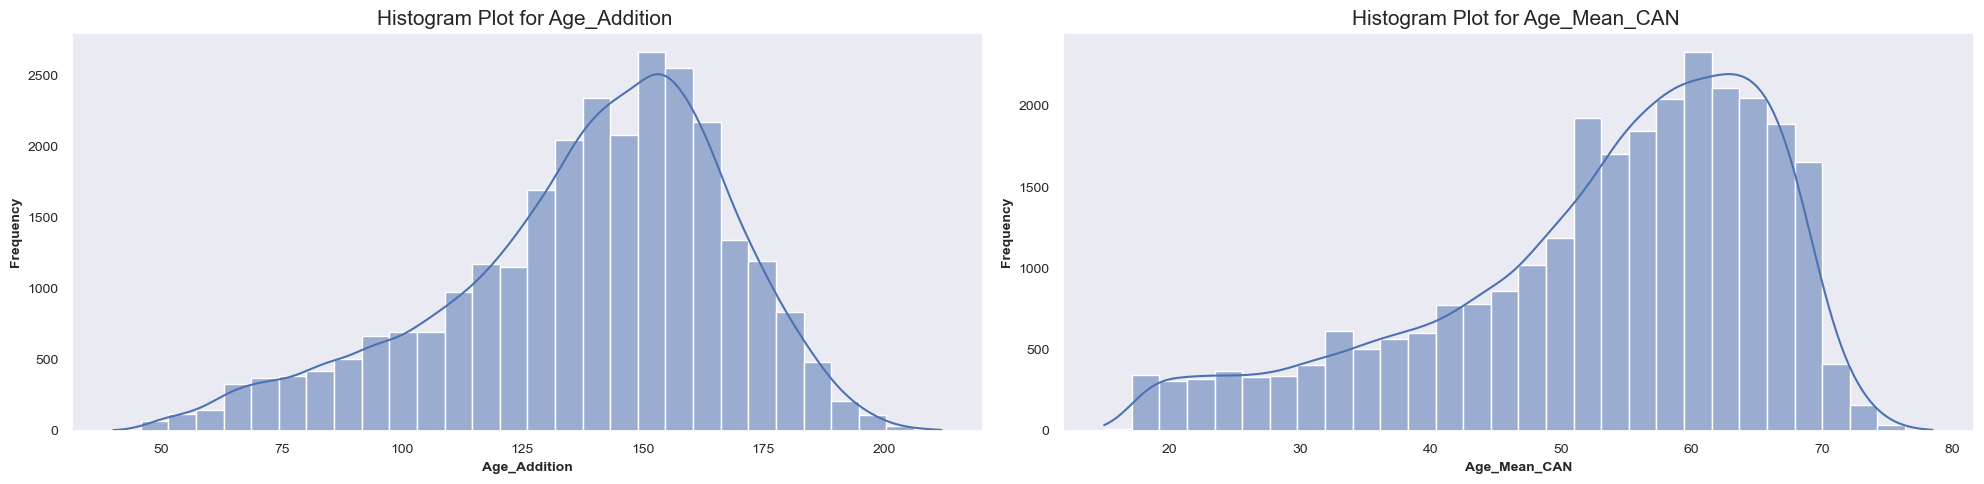

In [15]:
uv.plot_histogram(df, new, bins=30)

##### BMI
##### The standard BMI ranges for adults are:
- Underweight: BMI less than 18.5 kg/m²
- Normal weight: BMI 18.5 to 24.9 kg/m²
- Overweight: BMI 25 to 29.9 kg/m²
- Obesity: BMI 30 kg/m² or greater
- BMI = Weight (kg) / Height (m)² 

In [16]:
# examine features
features = uf.get_feature_list(df, 'BMI_')

           count       mean       std        min        25%        50%        75%        max
BMI_CAN  27481.0  27.472403  4.865925  15.000000  23.900000  27.200000  31.000000  48.700000
BMI_DON  27484.0  27.595158  6.062166  13.121499  23.384354  26.545539  30.668217  74.360965

:::: NaN Count:
BMI_CAN    13
BMI_DON    10


##### Calculate BMI

In [17]:
# display NaN BMIs
df[['WeightKg_CAN','HeightCm_CAN','BMI_CAN','WeightKg_DON','HeightCm_DON','BMI_DON']][(df.BMI_CAN.isna())|(df.BMI_DON.isna())]

,WeightKg_CAN,HeightCm_CAN,BMI_CAN,WeightKg_DON,HeightCm_DON,BMI_DON
1276,40.5,167.6,NaN,59.0,180.0,18.209877
3064,93.4,167.6,33.2,49.9,183.0,NaN
4057,NaN,149.9,NaN,35.0,137.0,18.647770
4625,41.0,171.1,NaN,62.6,183.0,18.692705
5413,46.3,160.0,18.1,43.0,173.0,NaN
5722,51.3,160.0,20.0,46.2,178.0,NaN
6907,NaN,124.0,NaN,23.2,115.0,17.542533
8620,NaN,149.9,NaN,55.7,161.0,21.488368
9521,NaN,154.9,NaN,55.0,157.0,22.313278
10242,55.3,147.3,25.5,39.8,163.0,NaN


###### HeightCm

In [18]:
# examine features
features = uf.get_feature_list(df, 'HeightCm')

                count        mean        std    min    25%    50%    75%    max
HeightCm_CAN  27494.0  173.647378  10.039060  124.0  167.6  175.0  180.3  213.4
HeightCm_DON  27494.0  173.903143   9.578505  115.0  167.6  175.0  180.3  213.0

:::: NaN Count:
HeightCm_CAN    0
HeightCm_DON    0


In [19]:
# create new feature
df['HeightCm_Addition'] = df.HeightCm_CAN + df.HeightCm_DON

# initialize list
new = ['HeightCm_Addition']

# update dataframe
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric = uf.insert_into_dataframe(df_numeric, new)
df_new = uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)

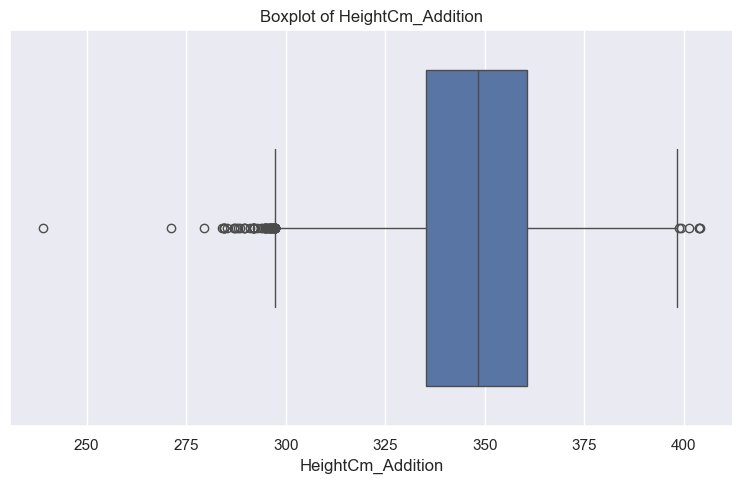

In [20]:
# boxplot
uv.plot_box(df, new, orientation='h')

###### WeightKg

In [21]:
# examine features
features = uf.get_feature_list(df, 'WeightKg')

                count       mean        std   min   25%   50%   75%    max
WeightKg_CAN  27487.0  83.252636  18.099450  29.9  70.3  82.6  95.3  159.1
WeightKg_DON  27490.0  83.497006  19.548529  23.2  70.0  80.7  94.0  198.0

:::: NaN Count:
WeightKg_CAN    7
WeightKg_DON    4


In [22]:
# new feature
df['WeightKg_Addition'] = df.WeightKg_CAN + df.WeightKg_DON

# initialize list
new = ['WeightKg_Addition']

# update DataFrame
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric =  uf.insert_into_dataframe(df_numeric, new)
df_new =  uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)

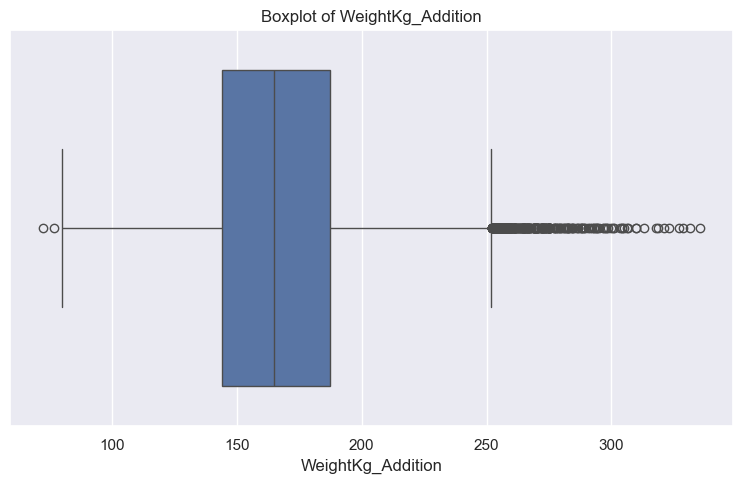

In [23]:
uv.plot_box(df, new, orientation='h')

In [24]:
# examine features
features = uf.get_feature_list(df, 'BMI_')

           count       mean       std        min        25%        50%        75%        max
BMI_CAN  27481.0  27.472403  4.865925  15.000000  23.900000  27.200000  31.000000  48.700000
BMI_DON  27484.0  27.595158  6.062166  13.121499  23.384354  26.545539  30.668217  74.360965

:::: NaN Count:
BMI_CAN    13
BMI_DON    10


In [25]:
df['BMI_CAN'] = df.WeightKg_CAN / np.square(df.HeightCm_CAN * 0.01)
df['BMI_DON'] = df.WeightKg_DON / np.square(df.HeightCm_DON * 0.01)

In [26]:
# create new feature
df['BMI_Addition'] = df.BMI_CAN + df.BMI_DON

# initialize list
new = ['BMI_Addition']

# update dataframe
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric = uf.insert_into_dataframe(df_numeric, new)
df_new = uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)

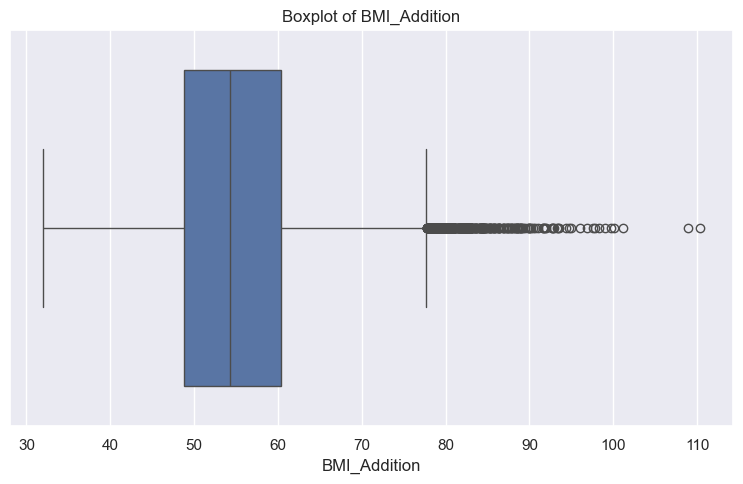

In [27]:
# boxplot
uv.plot_box(df, new, orientation='h')

##### BloodPH (Categorical)
- The normal blood pH range is indeed between 7.35 and 7.45. This slightly alkaline range is crucial for the proper functioning of enzymes and other biochemical reactions in the body.
    - A blood pH below 7.35 is considered acidic, and it can lead to a condition called acidosis. Acidosis can disrupt cellular functions and impair organ systems, particularly the cardiovascular and respiratory systems.
    - A blood pH above 7.45 is considered alkaline, and it can lead to a condition called alkalosis. Alkalosis can cause symptoms such as muscle twitching, hand tremors, and confusion.

In [28]:
# examine features
features = uf.get_feature_list(df, 'BloodPH')

               count      mean    std  min   25%   50%   75%   max
BloodPH_DON  27267.0  7.416161  0.074  5.0  7.38  7.42  7.46  7.93

:::: NaN Count:
BloodPH_DON    227


In [29]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
213,BloodPH_DON,DDR:Blood PH:,DDR,2004-06-30,NaT,CLINICAL INFORMATION,NUM,,,PH_DON,Numeric,


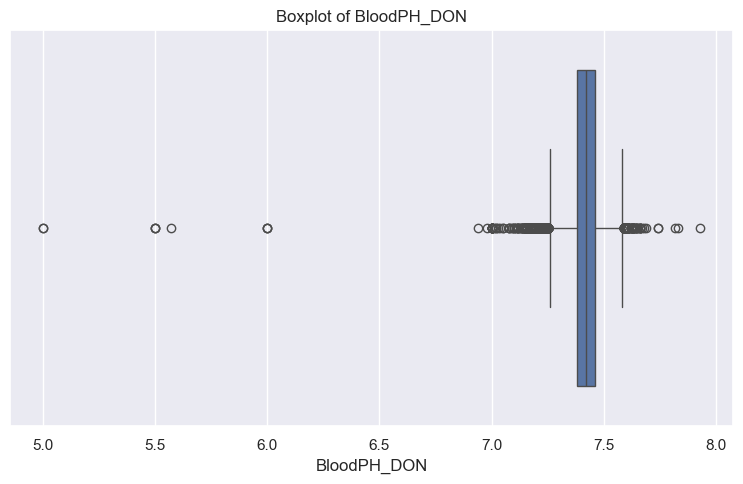

In [30]:
uv.plot_box(df, features, orientation='h')

##### [BloodUreaNitrogenLevel](https://www.frontiersin.org/journals/cardiovascular-medicine/articles/10.3389/fcvm.2023.1189884/full)
- Blood Urea Nitrogen (BUN) is a common blood test that measures the amount of urea nitrogen in the blood, which is a waste product formed from the breakdown of proteins.
    - Generally accepted range: 7 to 20 mg/dL (milligrams per deciliter).
    - Some sources report a slightly broader range of 6 to 24 mg/dL for adult men and 6 to 21 mg/dL for adult women. 

In [31]:
# examine features
features = uf.get_feature_list(df, 'BloodUreaNitrogenLevel')

                              count       mean        std  min   25%   50%   75%    max
BloodUreaNitrogenLevel_DON  27291.0  24.272559  20.110485  0.5  12.0  18.0  29.0  250.0

:::: NaN Count:
BloodUreaNitrogenLevel_DON    203


In [32]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
21,BloodUreaNitrogenLevel_DON,DECEASED DONOR-TERMINAL BLOOD UREA NITROGEN,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,BUN_DON,Numeric,


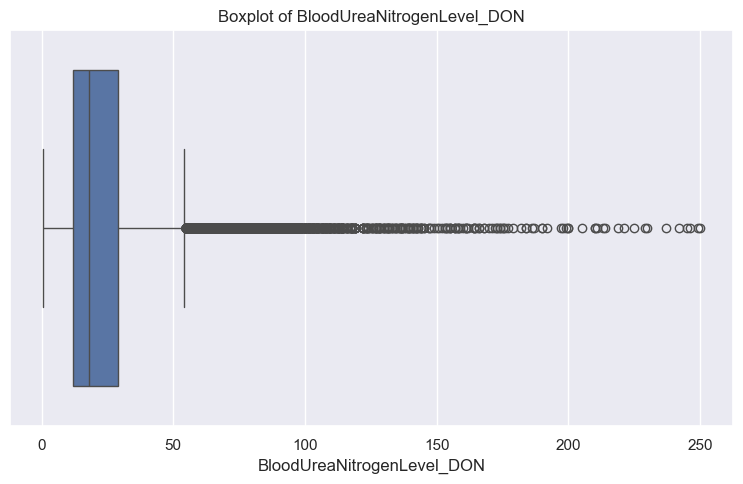

In [33]:
uv.plot_box(df, features, orientation='h')

##### [Creatinine](https://www.sciencedirect.com/science/article/pii/S0021915014013677?casa_token=ocgbMx1y4ikAAAAA:D0hbOvHvY45rjRH_LgJg62mSRUEu3ky2vZnuyhnyaP6xOphaF8WTWZ2TQ5KqGcNZi0xNrsLvunbZ)
- Creatinine levels can be affected by various health issues, including heart conditions. Generally, high creatinine levels are more common and often indicate that the kidneys are not functioning pr?operly. This can be due to conditions such as chronic kidney disease, dehydration, or even heart failure. When the heart is not pumping efficiently, it can lead to reduced blood flow to the kidneys, causing an increase in creatinine levels.

In [34]:
# examine features
features = uf.get_feature_list(df, 'Creatinine')

                              count      mean       std   min   25%  50%  75%   max
CreatinineRegistration_CAN  27359.0  1.365684  0.962710  0.08  0.94  1.2  1.5  24.0
CreatinineTransplant_CAN    27076.0  1.373118  1.009271  0.06  0.94  1.2  1.5  37.0
Creatinine_DON              27291.0  1.505226  1.557918  0.04  0.76  1.0  1.5  23.0

:::: NaN Count:
CreatinineRegistration_CAN    135
CreatinineTransplant_CAN      418
Creatinine_DON                203


In [35]:
df[features].corr()

,CreatinineRegistration_CAN,CreatinineTransplant_CAN,Creatinine_DON
CreatinineRegistration_CAN,1.000000,0.676508,-0.037203
CreatinineTransplant_CAN,0.676508,1.000000,-0.023678
Creatinine_DON,-0.037203,-0.023678,1.000000


In [36]:
# create new feature if non of the row contain NaN
df['Creatinine_Addition'] = df[features].apply(lambda row: row.sum() if row.notna().all() else np.nan, axis=1)
# initialize list
new = ['Creatinine_Addition']

# update DataFrame
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric =  uf.insert_into_dataframe(df_numeric, new)
df_new =  uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)

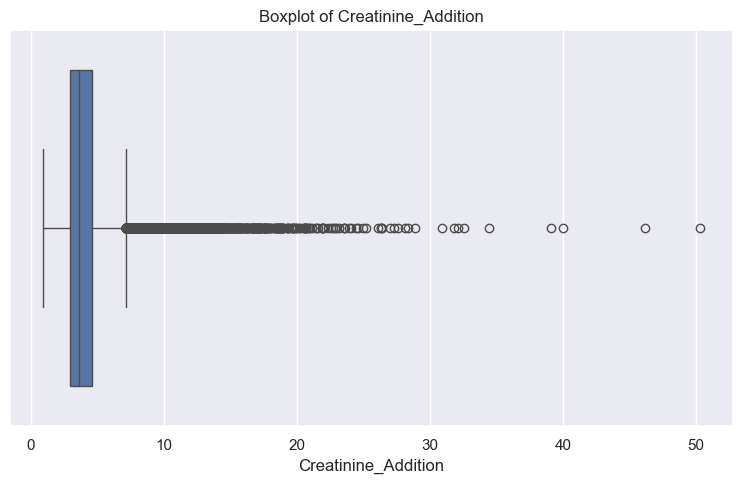

In [37]:
# boxplot
uv.plot_box(df, new, orientation='h')

In [38]:
# examine features
features = uf.get_feature_list(df, 'Creatinine')

                              count      mean       std   min   25%   50%   75%   max
CreatinineRegistration_CAN  27359.0  1.365684  0.962710  0.08  0.94  1.20  1.50  24.0
CreatinineTransplant_CAN    27076.0  1.373118  1.009271  0.06  0.94  1.20  1.50  37.0
Creatinine_Addition         26951.0  4.241332  2.342882  0.91  2.97  3.61  4.63  50.3
Creatinine_DON              27291.0  1.505226  1.557918  0.04  0.76  1.00  1.50  23.0

:::: NaN Count:
CreatinineRegistration_CAN    135
CreatinineTransplant_CAN      418
Creatinine_Addition           543
Creatinine_DON                203


##### DistanceFromDonorHospitaltoTXCenter

In [39]:
# examine features
features = uf.get_feature_list(df, 'DistanceFromDonorHospitaltoTXCenter')

                                       count        mean         std  min   25%    50%    75%     max
DistanceFromDonorHospitaltoTXCenter  27494.0  201.527351  222.020998  0.0  21.0  128.0  322.0  2215.0

:::: NaN Count:
DistanceFromDonorHospitaltoTXCenter    0


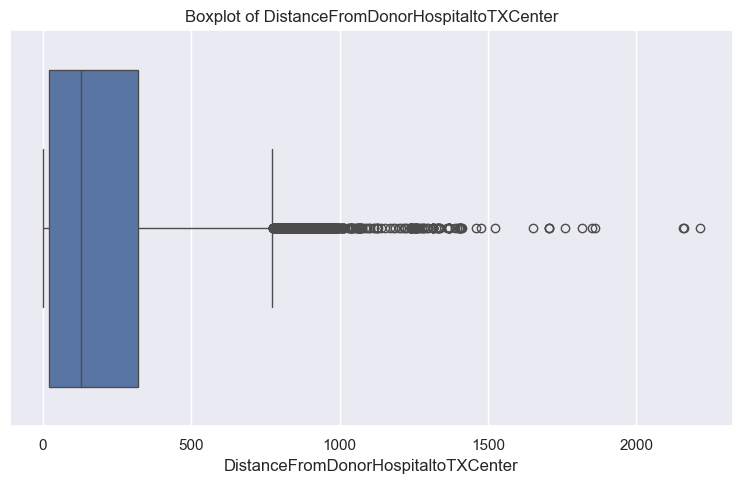

In [40]:
# boxplot
uv.plot_box(df, features, orientation='h')

##### Hematocrit
- Hematocrit is a blood test that measures the percentage of red blood cells (RBCs) in the total blood volume. It is an important indicator of overall health and can help diagnose various medical conditions.
    - Normal Hematocrit Ranges
        - Men: 38.3% to 48.6%
        - Women: 35.5% to 44.9% 

In [41]:
# examine features
features = uf.get_feature_list(df, 'Hematocrit')

                  count       mean     std  min   25%   50%   75%   max
Hematocrit_DON  27291.0  28.397493  5.0099  2.3  25.0  27.9  31.3  75.0

:::: NaN Count:
Hematocrit_DON    203


In [42]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
127,Hematocrit_DON,DDR:Hematocrit:,DDR,2004-06-30,NaT,CLINICAL INFORMATION,NUM,,,HEMATOCRIT_DON,Numeric,


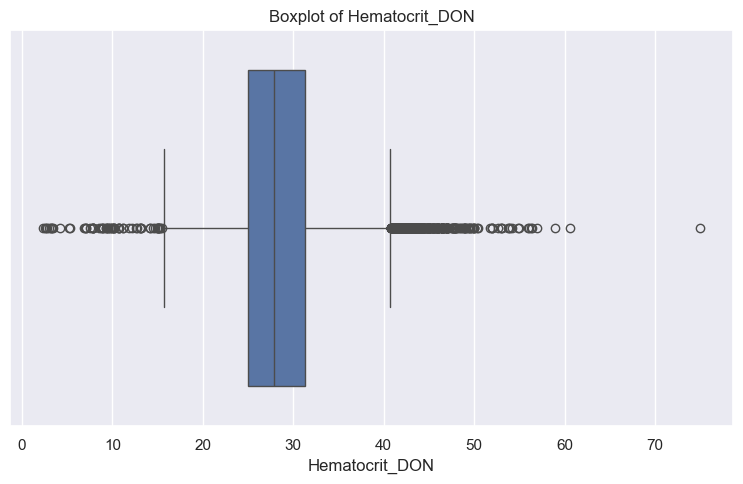

In [43]:
uv.plot_box(df, features, orientation='h')

##### Hemodynamics
- Hemodynamics refers to the study of blood flow and the forces involved in the circulatory system. It encompasses the physical principles governing blood movement through vessels and the heart, as well as the mechanics of blood flow and pressure regulation.
    - Here are some key ways hemodynamics can be affected:
        - Heart Failure: In heart failure, the heart's ability to pump blood effectively is compromised. This can lead to increased pressure in the heart and blood vessels, causing fluid buildup in the lungs and other tissues.
        - Valvular Heart Disease: Conditions like aortic stenosis or mitral regurgitation affect the flow of blood through the heart valves. This can lead to abnormal pressure gradients and changes in blood flow patterns, which can be detected through hemodynamic measurements.
        - Cardiomyopathies: These diseases affect the heart muscle, leading to changes in the heart's structure and function. Hemodynamic changes in cardiomyopathies can include altered cardiac output and increased filling pressures.
        - Hypertension: High blood pressure increases the workload on the heart, leading to changes in hemodynamics such as increased systemic vascular resistance and altered cardiac output1.
        - Pericardial Disease: Conditions like pericarditis or pericardial effusion can restrict the heart's movement, affecting hemodynamics by increasing pressures within the heart chambers and reducing cardiac output.

    - Hemodynamics:
        - Hemodynamics_SYS_CAN: Systolic blood pressure. (mmHg)
        - Hemodynamics_PA_DIA_CAN: Pulmonary artery diastolic pressure. (mmHg)
        - Hemodynamics_PA_MN_CAN: Pulmonary artery mean pressure. (mmHg)
        - Hemodynamics_PCW_CAN: Pulmonary capillary wedge pressure. (mmHg)
        - Hemodynamics_CO_CAN: Cardiac output. (L/min)

In [44]:
# examine features
features = uf.get_feature_list(df, 'Hemodynamics')

                                       count       mean        std   min    25%    50%    75%    max
HemodynamicsRegistration_CO_CAN      25907.0   4.260398   1.340504  0.39   3.32   4.10   5.00   15.0
HemodynamicsRegistration_PA_DIA_CAN  26479.0  20.504332   8.689102  0.00  14.00  20.00  26.00   91.0
HemodynamicsRegistration_PA_MN_CAN   26238.0  28.598895  10.199296  0.00  21.00  28.00  36.00   96.0
HemodynamicsRegistration_PCW_CAN     24881.0  19.112114   8.805536  0.00  12.00  19.00  25.00   50.0
HemodynamicsRegistration_SYS_CAN     26498.0  41.967507  14.231162  0.00  31.00  41.00  52.00  130.0
HemodynamicsTransplant_CO_CAN        25939.0   4.531083   1.458923  0.20   3.50   4.39   5.34   15.0
HemodynamicsTransplant_PA_DIA_CAN    26355.0  19.166428   8.481572  0.00  13.00  18.00  25.00  110.0
HemodynamicsTransplant_PA_MN_CAN     26115.0  27.018696   9.911634  0.00  20.00  26.00  34.00  110.0
HemodynamicsTransplant_PCW_CAN       25143.0  17.784904   8.675766  0.00  11.00  17.00  24.

In [45]:
df[features].corr()

,HemodynamicsRegistration_CO_CAN,HemodynamicsRegistration_PA_DIA_CAN,HemodynamicsRegistration_PA_MN_CAN,HemodynamicsRegistration_PCW_CAN,HemodynamicsRegistration_SYS_CAN,HemodynamicsTransplant_CO_CAN,HemodynamicsTransplant_PA_DIA_CAN,HemodynamicsTransplant_PA_MN_CAN,HemodynamicsTransplant_PCW_CAN,HemodynamicsTransplant_SYS_CAN
HemodynamicsRegistration_CO_CAN,1.000000,-0.213014,-0.189201,-0.234595,-0.149344,0.513201,-0.103378,-0.088282,-0.108389,-0.068698
HemodynamicsRegistration_PA_DIA_CAN,-0.213014,1.000000,0.892885,0.823537,0.785306,-0.071732,0.527120,0.513446,0.464825,0.462562
HemodynamicsRegistration_PA_MN_CAN,-0.189201,0.892885,1.000000,0.837692,0.918313,-0.052573,0.503240,0.559257,0.471483,0.537652
HemodynamicsRegistration_PCW_CAN,-0.234595,0.823537,0.837692,1.000000,0.763412,-0.077183,0.472317,0.492329,0.553182,0.453301
HemodynamicsRegistration_SYS_CAN,-0.149344,0.785306,0.918313,0.763412,1.000000,-0.034931,0.455553,0.539258,0.433570,0.581715
HemodynamicsTransplant_CO_CAN,0.513201,-0.071732,-0.052573,-0.077183,-0.034931,1.000000,-0.218884,-0.187500,-0.222123,-0.157365
HemodynamicsTransplant_PA_DIA_CAN,-0.103378,0.527120,0.503240,0.472317,0.455553,-0.218884,1.000000,0.901282,0.820059,0.790707
HemodynamicsTransplant_PA_MN_CAN,-0.088282,0.513446,0.559257,0.492329,0.539258,-0.187500,0.901282,1.000000,0.832295,0.916934
HemodynamicsTransplant_PCW_CAN,-0.108389,0.464825,0.471483,0.553182,0.433570,-0.222123,0.820059,0.832295,1.000000,0.760729
HemodynamicsTransplant_SYS_CAN,-0.068698,0.462562,0.537652,0.453301,0.581715,-0.157365,0.790707,0.916934,0.760729,1.000000


In [46]:
# examine features
features = uf.get_feature_list(df, 'Hemodynamics')

                                       count       mean        std   min    25%    50%    75%    max
HemodynamicsRegistration_CO_CAN      25907.0   4.260398   1.340504  0.39   3.32   4.10   5.00   15.0
HemodynamicsRegistration_PA_DIA_CAN  26479.0  20.504332   8.689102  0.00  14.00  20.00  26.00   91.0
HemodynamicsRegistration_PA_MN_CAN   26238.0  28.598895  10.199296  0.00  21.00  28.00  36.00   96.0
HemodynamicsRegistration_PCW_CAN     24881.0  19.112114   8.805536  0.00  12.00  19.00  25.00   50.0
HemodynamicsRegistration_SYS_CAN     26498.0  41.967507  14.231162  0.00  31.00  41.00  52.00  130.0
HemodynamicsTransplant_CO_CAN        25939.0   4.531083   1.458923  0.20   3.50   4.39   5.34   15.0
HemodynamicsTransplant_PA_DIA_CAN    26355.0  19.166428   8.481572  0.00  13.00  18.00  25.00  110.0
HemodynamicsTransplant_PA_MN_CAN     26115.0  27.018696   9.911634  0.00  20.00  26.00  34.00  110.0
HemodynamicsTransplant_PCW_CAN       25143.0  17.784904   8.675766  0.00  11.00  17.00  24.

In [47]:
# create new feature if non of the row contain NaN
df['Hemodynamics_Addition_CAN'] = df[features].apply(lambda row: row.sum() if row.notna().all() else np.nan, axis=1)

# initialize list
featuresD = ['Hemodynamics_Addition_CAN']

In [48]:
df[features + featuresD].corr()

,HemodynamicsRegistration_CO_CAN,HemodynamicsRegistration_PA_DIA_CAN,HemodynamicsRegistration_PA_MN_CAN,HemodynamicsRegistration_PCW_CAN,HemodynamicsRegistration_SYS_CAN,HemodynamicsTransplant_CO_CAN,HemodynamicsTransplant_PA_DIA_CAN,HemodynamicsTransplant_PA_MN_CAN,HemodynamicsTransplant_PCW_CAN,HemodynamicsTransplant_SYS_CAN,Hemodynamics_Addition_CAN
HemodynamicsRegistration_CO_CAN,1.000000,-0.213014,-0.189201,-0.234595,-0.149344,0.513201,-0.103378,-0.088282,-0.108389,-0.068698,-0.146948
HemodynamicsRegistration_PA_DIA_CAN,-0.213014,1.000000,0.892885,0.823537,0.785306,-0.071732,0.527120,0.513446,0.464825,0.462562,0.822865
HemodynamicsRegistration_PA_MN_CAN,-0.189201,0.892885,1.000000,0.837692,0.918313,-0.052573,0.503240,0.559257,0.471483,0.537652,0.872609
HemodynamicsRegistration_PCW_CAN,-0.234595,0.823537,0.837692,1.000000,0.763412,-0.077183,0.472317,0.492329,0.553182,0.453301,0.802123
HemodynamicsRegistration_SYS_CAN,-0.149344,0.785306,0.918313,0.763412,1.000000,-0.034931,0.455553,0.539258,0.433570,0.581715,0.852833
HemodynamicsTransplant_CO_CAN,0.513201,-0.071732,-0.052573,-0.077183,-0.034931,1.000000,-0.218884,-0.187500,-0.222123,-0.157365,-0.118492
HemodynamicsTransplant_PA_DIA_CAN,-0.103378,0.527120,0.503240,0.472317,0.455553,-0.218884,1.000000,0.901282,0.820059,0.790707,0.814664
HemodynamicsTransplant_PA_MN_CAN,-0.088282,0.513446,0.559257,0.492329,0.539258,-0.187500,0.901282,1.000000,0.832295,0.916934,0.870169
HemodynamicsTransplant_PCW_CAN,-0.108389,0.464825,0.471483,0.553182,0.433570,-0.222123,0.820059,0.832295,1.000000,0.760729,0.788812
HemodynamicsTransplant_SYS_CAN,-0.068698,0.462562,0.537652,0.453301,0.581715,-0.157365,0.790707,0.916934,0.760729,1.000000,0.848276


In [49]:
# update DataFrame
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric =  uf.insert_into_dataframe(df_numeric, featuresD)
df_new =  uf.insert_into_dataframe(df_new, featuresD)
df_can = uf.insert_into_dataframe(df_can, featuresD)

##### [IschemicTimeHour](https://www.sciencedirect.com/science/article/pii/S0041134513004715)
- Ischemic time refers to the period during which an organ or tissue is deprived of blood supply and, consequently, oxygen. This concept is crucial in various medical contexts, particularly in transplantation and acute medical conditions like strokes and heart attacks.
    - Importance in Transplantation
        - Kidney: Optimal cold ischemic time is less than 20 hours, with suboptimal times extending beyond 36 hours.
        - Liver: Optimal cold ischemic time is less than 10 hours.
        - Heart: Optimal cold ischemic time is less than 4 hours.
        - Lung: Optimal cold ischemic time is less than 8 hours1.
    - Clinical Implications
        - Prolonged ischemic times can lead to greater tissue damage and delayed organ function.
        - Shorter ischemic times are associated with better transplant outcomes and long-term success

In [50]:
# examine features
features = uf.get_feature_list(df, 'IschemicTimeHour_DON')

                        count      mean       std  min  25%  50%  75%   max
IschemicTimeHour_DON  26941.0  3.234223  1.070724  0.3  2.5  3.3  3.9  12.0

:::: NaN Count:
IschemicTimeHour_DON    553


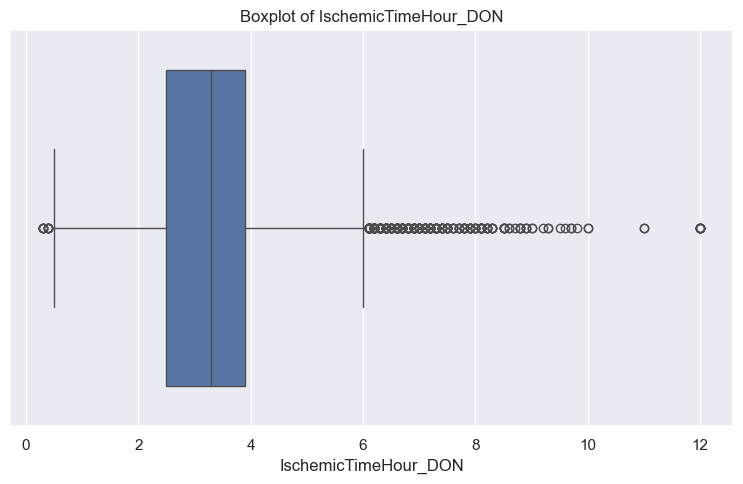

In [51]:
uv.plot_box(df, features)

##### LV_EjectionFractionPercent
- Left ventricular ejection fraction (LVEF) is a critical measurement used to assess the function of the heart, particularly in the context of organ donation and transplantation. It represents the percentage of blood that is pumped out of the left ventricle with each heartbeat.
    - Normal LVEF: Typically, a normal ejection fraction is between 50% and 70%.
    - Mildly Reduced LVEF: Values between 41% and 49% may indicate mild dysfunction.
    - Reduced LVEF: An LVEF less than 40% is often considered significantly reduced and may be a contraindication for organ donation, although recent studies suggest that donor hearts with reduced LVEF can still be viable for transplantation under certain conditions.

In [52]:
# examine features
features = uf.get_feature_list(df, 'LV_EjectionFractionPercent')

                                  count       mean       std   min   25%   50%   75%   max
LV_EjectionFractionPercent_DON  27463.0  61.619236  6.645749  10.0  56.0  60.0  65.0  99.0

:::: NaN Count:
LV_EjectionFractionPercent_DON    31


In [53]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
195,LV_EjectionFractionPercent_DON,DECEASED DONOR LV EJECTION FRACTION %,DDR,1999-10-25,NaT,HEART DONOR'S CARDIAC FUNCTION,NUM,,,LV_EJECT,Numeric,


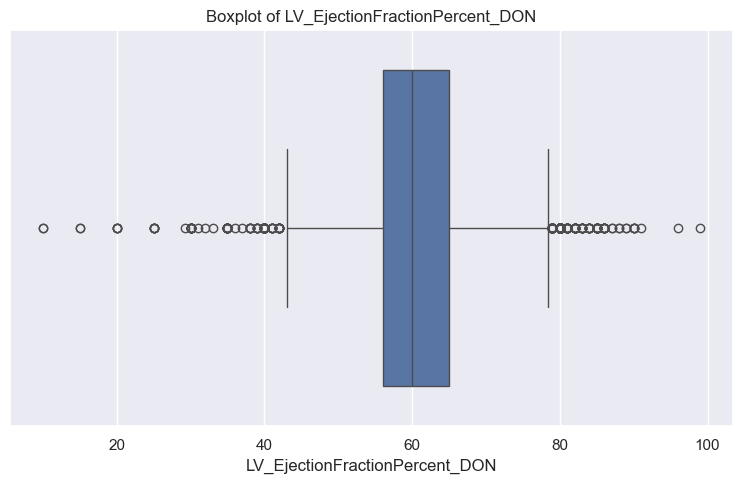

In [54]:
uv.plot_box(df, features, orientation='h')

##### [Level_SGOT](https://www.mdpi.com/2073-4409/9/3/567)
- SGOT (AST) and ALT (DON) are enzymes that are commonly measured to assess liver health:
    - SGOT (AST): Also known as aspartate aminotransferase (AST), this enzyme is found in various tissues, including the liver, heart, muscles, and kidneys. It plays a role in amino acid metabolism. Elevated levels of AST in the blood can indicate liver damage, heart problems, or muscle injury.
        - Conservative normal range of 8 to 45 units/L for healthy individuals. 
    - SGOT (ALT): Also known as alanine aminotransferase (ALT), this enzyme is primarily found in the liver. It helps convert proteins into energy for liver cells. High levels of ALT are more specific to liver damage compared to AST.
        - The typical normal range for ALT is approximately 7 to 56 units per liter (U/L) of serum. However, ranges may vary slightly between laboratories. 

In [55]:
# examine features
features = uf.get_feature_list(df, 'Level_SGOT')

                      count        mean         std  min   25%   50%   75%      max
Level_SGOT_ALT_DON  27287.0  114.875032  408.872451  3.0  23.0  41.0  83.0  44117.0
Level_SGOT_AST_DON  27287.0  102.015934  302.539273  0.3  26.0  44.0  87.0  10254.0

:::: NaN Count:
Level_SGOT_ALT_DON    207
Level_SGOT_AST_DON    207


In [56]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
259,Level_SGOT_AST_DON,DECEASED DONOR-TERMINAL SGOT/AST,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,SGOT_DON,Numeric,
260,Level_SGOT_ALT_DON,DECEASED DONOR-TERMINAL SGPT/ALT,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,SGPT_DON,Numeric,


In [57]:
df[features].corr()

,Level_SGOT_ALT_DON,Level_SGOT_AST_DON
Level_SGOT_ALT_DON,1.000000,0.556127
Level_SGOT_AST_DON,0.556127,1.000000


##### Addition can help you understand the combined enzyme activity. Capturing the overall level of these enzymes might be helpful.

In [58]:
# new feature
df['Level_SGOT_Addition_DON'] = df.Level_SGOT_ALT_DON + df.Level_SGOT_AST_DON

# initialize list
new = ['Level_SGOT_Addition_DON']

# update DataFrame
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric =  uf.insert_into_dataframe(df_numeric, new)
df_new =  uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)
df_don = uf.insert_into_dataframe(df_don, new)

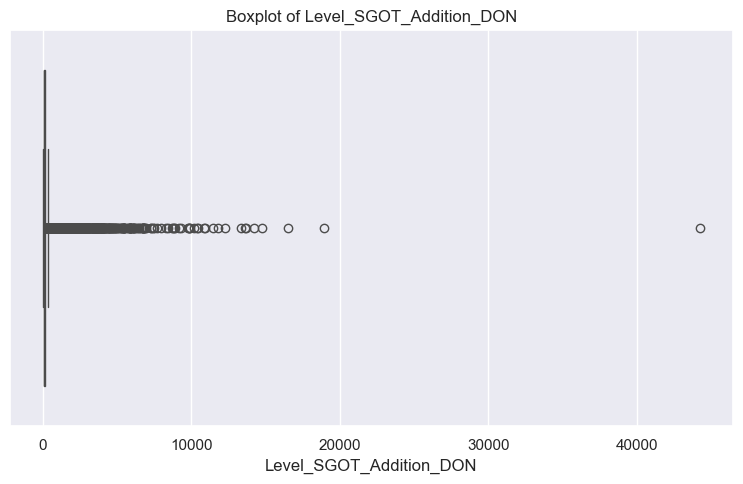

In [59]:
uv.plot_box(df, new, orientation='h')

##### LungPO2
    - Remove:
        - LungPO2_Done_DON 
- Lung PO2 (Partial Pressure of Oxygen) is a measure of the pressure exerted by oxygen in the lungs. It is an important indicator of how well oxygen is being transferred from the air in the lungs to the blood. The value of PO2 is typically measured in millimeters of mercury (mmHg) and provides insight into the efficiency of the respiratory system. In clinical and transplant contexts, particularly with donors, it helps assess the oxygenation status of the donor’s lungs, which is critical when evaluating organs for transplantation. `LungPO2_DON`: PO2 on 100% oxygen refers to the partial pressure of oxygen in arterial blood when a patient is breathing 100% oxygen.

- The Fraction of Inspired Oxygen (Lung FIO2) refers to the concentration of oxygen in the air that is being inhaled by a patient. It is a critical parameter in managing patients with respiratory distress and is often expressed as a percentage or as a decimal. `LungPO2_FIO2_DON`: Lung pO2 on FiO2 refers to the partial pressure of oxygen in arterial blood (PaO2) in relation to the fraction of inspired oxygen (FiO2).
    - Normal Range for FIO2
        - Room Air: The FIO2 in room air is approximately 21% or 0.21 as a decimal.
    - Supplemental Oxygen:
        - Low-Flow Oxygen Therapy: FIO2 can range from about 24% (0.24) to 40% (0.40), depending on the delivery device (e.g., nasal cannula, simple face mask).
        - High-Flow Oxygen Therapy: FIO2 can be set between 40% (0.40) and 100% (1.0), especially in more controlled environments like intensive care units.<br><br>

- The partial pressure of oxygen (PO2) levels can significantly impact heart conditions.
    - Low PO2 levels, or hypoxemia, can lead to insufficient oxygen in the blood, which stresses the heart as it works harder to supply oxygen to tissues1. This can exacerbate conditions like congestive heart failure.
    - To compensate for low oxygen levels, the heart may increase its rate and output, which can strain the heart over time2.
    - Even if blood oxygenation appears normal, poor cardiac output can result in inadequate oxygen delivery to tissues, leading to hypoxia. This can cause symptoms like chest pain, shortness of breath, and fatigue.
    - Interestingly, higher bilirubin levels, which can be influenced by PO2, have been associated with a reduced risk of cardiovascular diseases due to their antioxidant properties.

In [60]:
# examine features
features = uf.get_feature_list(df, 'LungPO2')

                    count unique      top   freq        mean         std   min    25%    50%    75%    max
LungPO2_DON       27254.0    NaN      NaN    NaN  281.117169  159.796818  7.38  131.0  258.0  426.0  698.0
LungPO2_Done_DON    27494      3  Missing  19938         NaN         NaN   NaN    NaN    NaN    NaN    NaN
LungPO2_FIO2_DON  27175.0    NaN      NaN    NaN   82.080221   25.587828   1.0   60.0  100.0  100.0  100.0

:::: NaN Count:
LungPO2_DON         240
LungPO2_Done_DON      0
LungPO2_FIO2_DON    319


In [61]:
df.LungPO2_Done_DON.value_counts(dropna=False)

LungPO2_Done_DON
Missing    19938
Yes         7525
No            31
Name: count, dtype: int64

In [62]:
# remove feature
features.remove('LungPO2_Done_DON')
# corr
df[features].corr()

,LungPO2_DON,LungPO2_FIO2_DON
LungPO2_DON,1.000000,0.617971
LungPO2_FIO2_DON,0.617971,1.000000


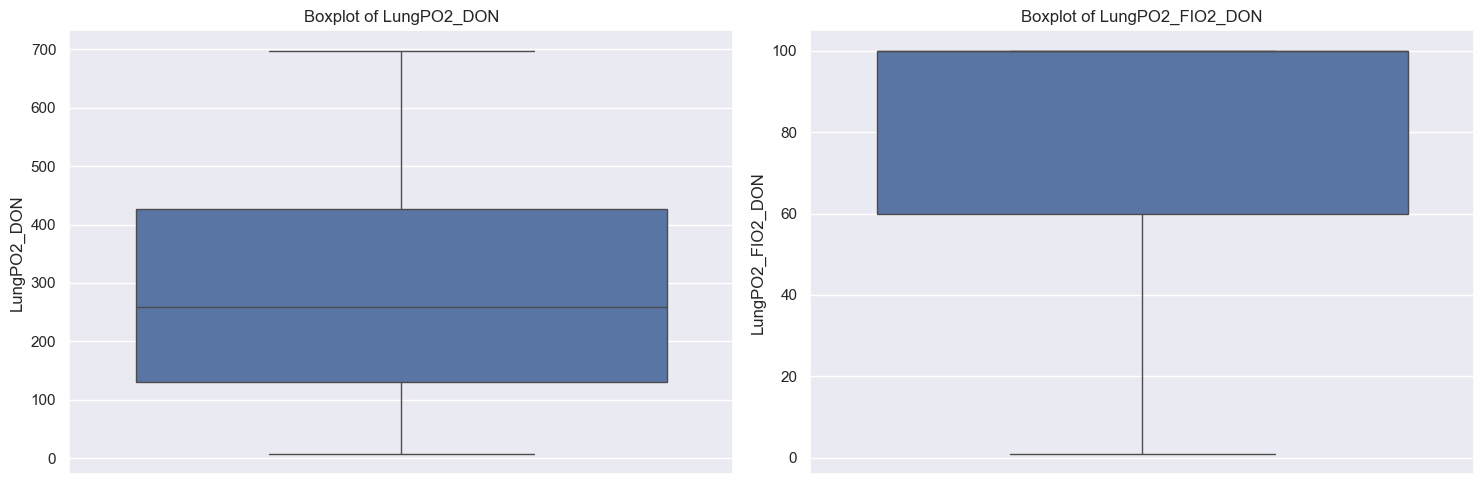

In [63]:
uv.plot_box(df, features, orientation='v')

##### OrganRecovery
- Normal `PCO2` Levels: The normal range for arterial blood `PCO2` is 35 to 45 mmHg (millimeters of mercury) or 4.7 to 6.0 kPa

In [64]:
# examine features
features = uf.get_feature_list(df, 'OrganRecovery')

                          count      mean       std   min   25%   50%   75%    max
OrganRecovery_PCO2_DON  27261.0  38.66196  7.050992  10.1  34.0  38.0  42.2  116.3

:::: NaN Count:
OrganRecovery_PCO2_DON    233


In [65]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
208,OrganRecovery_PCO2_DON,DDR:pCO2:,DDR,2004-06-30,NaT,ORGAN RECOVERY,NUM,,,PCO2_DON,Numeric,Maintaining appropriate PCO2 levels is crucial for preserving organ function and optimizing outcomes in transplantation.


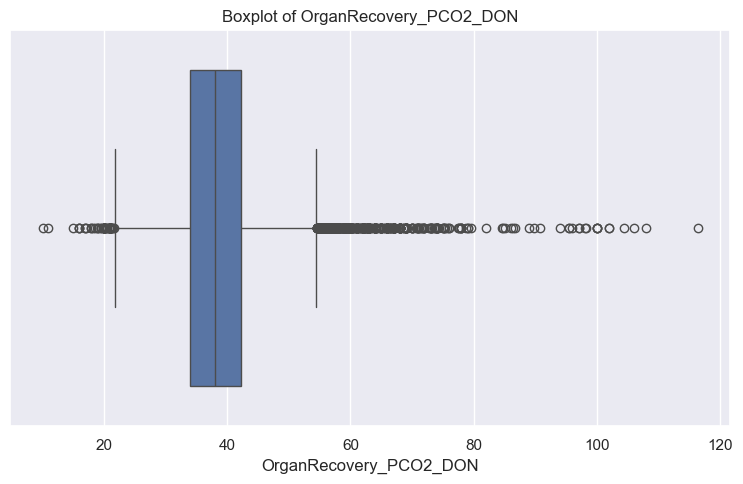

In [66]:
uv.plot_box(df, features, orientation='h')

##### [Bilirubin](https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)
- Heart conditions can indeed influence total bilirubin levels, though the relationship is complex. Generally, higher bilirubin levels have been associated with a reduced risk of cardiovascular diseases (CVD). This is because bilirubin has antioxidant properties that may protect against oxidative stress and inflammation, which are key factors in the development of CVD. However, certain heart conditions, especially those that affect liver function or blood flow, could potentially lead to changes in bilirubin levels. For example, congestive heart failure can cause liver congestion, which might impair the liver's ability to process bilirubin, potentially leading to elevated levels.
- Bilirubin is a clinical measurement that evaluates the combined levels of direct (conjugated) and indirect (unconjugated) bilirubin in the blood. It is an important diagnostic marker for liver function, bile duct health, and conditions like jaundice.

In [67]:
# examine features
features = uf.get_feature_list(df, 'Bilirubin')

                                count      mean       std  min  25%  50%  75%   max
TerminalTotalBilirubin_DON    27288.0  1.044261  1.427990  0.0  0.5  0.7  1.1  45.4
TotalBilirubinTransplant_CAN  27041.0  0.995037  1.732819  0.1  0.5  0.7  1.1  80.0

:::: NaN Count:
TerminalTotalBilirubin_DON      206
TotalBilirubinTransplant_CAN    453


In [68]:
# new feature
df['TotalBilirubin_Addition'] = df.TotalBilirubinTransplant_CAN + df.TerminalTotalBilirubin_DON

# initialize list
new = ['TotalBilirubin_Addition']

# update DataFrame
df_drop  = uf.insert_into_dataframe(df_drop, features)
df_numeric =  uf.insert_into_dataframe(df_numeric, new)
df_new =  uf.insert_into_dataframe(df_new, new)
df_both = uf.insert_into_dataframe(df_both, new)

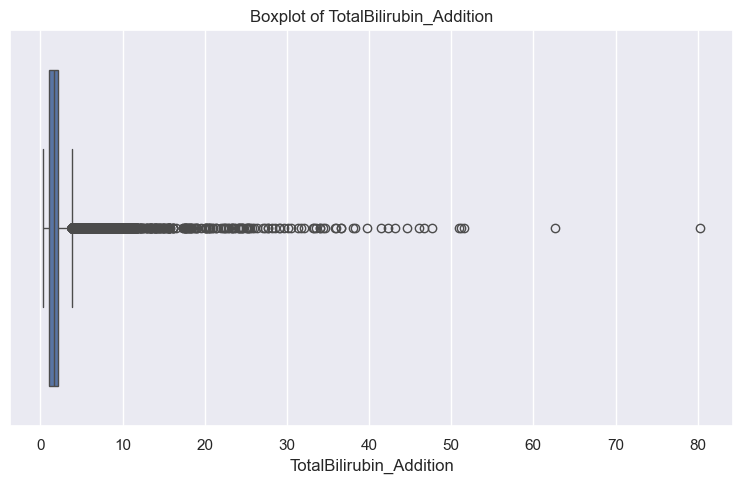

In [69]:
uv.plot_box(df, new, orientation='h')

##### TotalDayWaitList

In [70]:
# examine features
features = uf.get_feature_list(df, 'TotalDayWaitList')

                        count        mean         std  min   25%   50%    75%     max
TotalDayWaitList_CAN  27494.0  192.774314  311.074495  0.0  18.0  69.0  231.0  3835.0

:::: NaN Count:
TotalDayWaitList_CAN    0


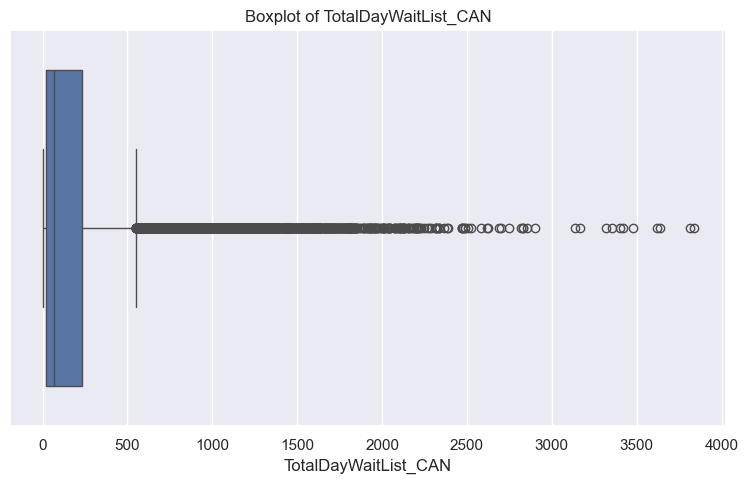

In [71]:
uv.plot_box(df, features, orientation='h')

### Nominal

In [72]:
# remove unused category
df = uf.remove_cat_zero_count(df).copy()

In [73]:
print(sorted(df_nominal.column.to_list()))

['AcuteRejectionEpisode', 'AirwayDehiscencePostTransplant', 'AllocationType_DON', 'AntiHypertensive_DON', 'AntibodyResultHBSAB_DON', 'AntibodyResultRPR_VDRL_DON', 'Antibody_HEP_C_DON', 'AntigenBW4_CAN', 'AntigenBW6_CAN', 'AntigenC1_CAN', 'AntigenC2_CAN', 'AntigenDA1_DON', 'AntigenDA2_DON', 'AntigenDB1_DON', 'AntigenDB2_DON', 'AntigenDQ1_CAN', 'AntigenDQ2_CAN', 'AntigenDR1_DON', 'AntigenDR2_DON', 'AntigenDR51_2_CAN', 'AntigenDR51_CAN', 'AntigenDR52_2_CAN', 'AntigenDR52_CAN', 'AntigenDR53_2_CAN', 'AntigenDR53_CAN', 'AntigenRA1_CAN', 'AntigenRA2_CAN', 'AntigenRB1_CAN', 'AntigenRB2_CAN', 'AntigenRDR1_CAN', 'AntigenRDR2_CAN', 'ArginnieManagement_DON', 'Biopsy_DON', 'BloodGroupMatchLevel', 'BloodGroup_CAN', 'BloodGroup_DON', 'BloodInfectionSource_DON', 'BronchoscopyLeft_DON', 'BronchoscopyRight_DON', 'CMVStatus_Transplant_CAN', 'CMV_IGG_Transplant_CAN', 'CMV_IGM_Transplant_CAN', 'CancerExtraCranial_DON', 'CancerHistory_DON', 'CancerIntraCranial_DON', 'CancerSkin_DON', 'CardiacArrest_DON', 'C

#### User Function(s)

In [74]:
def valuCounts(data, featuresList):
    for feature in featuresList:
        print(data[feature].value_counts(dropna=False).to_string())
        print('\n')

def genericMapCat(value):
    if value in ['Missing', 'Not Done', 'Indeterminate', 'UNKNOWN', 'Pending', 'Cannot Disclose']:
        return 'Unknown'
    else:
        return value


def antigenMapCat(value):
    if value in ['Not Tested','Unknown', 'Not Done']:
        return 'Unknown'
    elif value == '0':
        return 'Negative'
    else:
        return value  


def antigenCDR(value):
    if value in ['0', 'No second antigen detected']:
        return 'Negative'
    elif value in ['Missing', 'Not Done', 'Not Tested']:
        return 'Unknown'
    else:
        return 'Positive'


def bronchMapCat(value):
    if value in ['Missing','No Bronchoscopy','Unknown','Unknown if bronchoscopy performed']:
        return 'Unknown'
    elif value in ['Normal']:
        return value
    else:
        return 'Abnormal'


def cmvMapCat(value):
    if value in ['Indeterminate','Not Done','Missing']:
        return 'Unknown'
    else:
        return value


def xrayMapCat(value):
    if value in ['Missing', 'Results Unknown', 'No chest x-ray']:
        return 'Unknown'
    elif value in ['Normal']:
        return value
    else:
        return 'Abnormal'


def epsteinBarrMapCat(value):
    if value in ['Not Done','Indeterminate', 'Missing', 'Pending']:
        return 'Unknown'
    else:
        return value

##### AcuteRejectionEpisode (LABEL)

In [75]:
features = uf.get_feature_list(df, 'AcuteRejectionEpisode')

                       count unique top   freq
AcuteRejectionEpisode  27494      4  No  21925

:::: NaN Count:
AcuteRejectionEpisode    0


In [76]:
valuCounts(df, features)

AcuteRejectionEpisode
No                                                             21925
Yes, at least one episode treated with anti-rejection agent     2844
Yes, none treated with additional anti-rejection agent          2253
Missing                                                          472




In [77]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

AcuteRejectionEpisode
No                                                             21925
Yes, at least one episode treated with anti-rejection agent     2844
Yes, none treated with additional anti-rejection agent          2253
Unknown                                                          472




##### AirwayDehiscencePostTransplant

In [78]:
features = uf.get_feature_list(df, 'AirwayDehiscencePostTransplant')

                                count unique top   freq
AirwayDehiscencePostTransplant  27494      4  No  26834

:::: NaN Count:
AirwayDehiscencePostTransplant    0


In [79]:
valuCounts(df, features)

AirwayDehiscencePostTransplant
No         26834
Missing      464
Unknown      123
Yes           73




In [80]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

AirwayDehiscencePostTransplant
No         26834
Unknown      587
Yes           73




##### AllocationType_DON

In [81]:
features = uf.get_feature_list(df, 'AllocationType_DON')

                    count unique    top   freq
AllocationType_DON  27494      4  Local  13907

:::: NaN Count:
AllocationType_DON    0


In [82]:
valuCounts(df, features)

AllocationType_DON
Local            13907
National          8311
Regional          5251
Foreign Donor       25




##### AntiHypertensive_DON

In [83]:
features = uf.get_feature_list(df, 'AntiHypertensive_DON')

                      count unique top   freq
AntiHypertensive_DON  27494      4  No  18224

:::: NaN Count:
AntiHypertensive_DON    0


In [84]:
valuCounts(df, features)

AntiHypertensive_DON
No         18224
Yes         9057
Missing      204
Unknown        9




In [85]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

AntiHypertensive_DON
No         18224
Yes         9057
Unknown      213




##### Antibody Result

In [86]:
features = uf.get_feature_list(df, 'AntibodyResult')

                            count unique       top   freq
AntibodyResultHBSAB_DON     27494      7  Not Done  23406
AntibodyResultRPR_VDRL_DON  27494      4  Negative  26751

:::: NaN Count:
AntibodyResultHBSAB_DON       0
AntibodyResultRPR_VDRL_DON    0


In [87]:
valuCounts(df, features)

AntibodyResultHBSAB_DON
Not Done           23406
Negative            2410
Positive            1570
Indeterminate         57
Missing               44
Unknown                6
Cannot Disclose        1


AntibodyResultRPR_VDRL_DON
Negative    26751
Not Done      542
Positive      181
Missing        20




In [88]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

AntibodyResultHBSAB_DON
Unknown     23514
Negative     2410
Positive     1570


AntibodyResultRPR_VDRL_DON
Negative    26751
Unknown       562
Positive      181




##### Antibody_HEP

In [89]:
features = uf.get_feature_list(df, 'Antibody_HEP')

                    count unique       top   freq
Antibody_HEP_C_DON  27494      5  Negative  26048

:::: NaN Count:
Antibody_HEP_C_DON    0


In [90]:
valuCounts(df, features)

Antibody_HEP_C_DON
Negative    26048
Positive     1441
Missing         3
Not Done        1
Pending         1




In [91]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Antibody_HEP_C_DON
Negative    26048
Positive     1441
Unknown         5




##### AntigenB

In [92]:
features = uf.get_feature_list(df, 'AntigenBW')

                count unique top   freq
AntigenBW4_CAN  27494      4   0  18669
AntigenBW6_CAN  27494      4   0  18337

:::: NaN Count:
AntigenBW4_CAN    0
AntigenBW6_CAN    0


In [93]:
valuCounts(df, features)

AntigenBW4_CAN
0           18669
Positive     5980
Negative     2840
Not Done        5


AntigenBW6_CAN
0           18337
Positive     7989
Negative     1167
Not Done        1




In [94]:
# remap
df[features] = df[features].map(antigenMapCat).fillna(df[features])
valuCounts(df, features)

AntigenBW4_CAN
Negative    21509
Positive     5980
Unknown         5


AntigenBW6_CAN
Negative    19504
Positive     7989
Unknown         1




##### AntigenC

In [95]:
features = uf.get_feature_list(df, 'AntigenC')

               count unique top   freq
AntigenC1_CAN  27494     37   0  18502
AntigenC2_CAN  27494     45   0  19309

:::: NaN Count:
AntigenC1_CAN    0
AntigenC2_CAN    0


In [96]:
valuCounts(df, features)

AntigenC1_CAN
0        18502
07        1933
04        1817
06         888
05         867
02         852
10         694
01         538
09         355
08         233
12         132
16          96
04:01       78
03:04       71
15          63
07:01       63
07:02       40
14          36
03:03       35
02:02       34
03          33
01:02       32
17          31
02:10       16
05:01       11
18           8
03:02        6
16:01        6
07:04        5
06:02        5
08:02        4
12:03        3
08:04        2
15:05        2
07:18        1
03:06        1
17:01        1


AntigenC2_CAN
0        19309
07        2302
16         750
10         611
12         600
06         591
08         527
04         475
15         391
17         382
05         369
09         292
14         197
18         127
07:02       92
07:01       89
02          81
16:01       53
04:01       41
12:03       37
01          30
08:02       26
17:01       19
14:02       16
15:02       12
07:04       12
03          11
03:04     

In [97]:
# remap
df[features] = df[features].map(antigenCDR).fillna(df[features])
valuCounts(df, features)

AntigenC1_CAN
Negative    18502
Positive     8992


AntigenC2_CAN
Negative    19309
Positive     8185




##### AntigenD

In [98]:
features = uf.get_feature_list(df, 'AntigenD')

                   count unique top   freq
AntigenDA1_DON     27494     40   2  10926
AntigenDA2_DON     27494     47  24   3050
AntigenDB1_DON     27494     82   7   5447
AntigenDB2_DON     27494     90  44   3942
AntigenDQ1_CAN     27494     25   0  18245
AntigenDQ2_CAN     27494     25   0  19333
AntigenDR1_DON     27494     44   4   6809
AntigenDR2_DON     27494     48  15   5737
AntigenDR51_2_CAN  27494      8   0  25924
AntigenDR51_CAN    27494      9   0  19712
AntigenDR52_2_CAN  27494     10   0  25828
AntigenDR52_CAN    27494     10   0  19139
AntigenDR53_2_CAN  27494      6   0  25917
AntigenDR53_CAN    27494      7   0  19450

:::: NaN Count:
AntigenDA1_DON       0
AntigenDA2_DON       0
AntigenDB1_DON       0
AntigenDB2_DON       0
AntigenDQ1_CAN       0
AntigenDQ2_CAN       0
AntigenDR1_DON       0
AntigenDR2_DON       0
AntigenDR51_2_CAN    0
AntigenDR51_CAN      0
AntigenDR52_2_CAN    0
AntigenDR52_CAN      0
AntigenDR53_2_CAN    0
AntigenDR53_CAN      0


In [99]:
valuCounts(df, features)

AntigenDA1_DON
2          10926
1           6203
3           3377
24          1629
11          1231
23          1001
30           731
29           469
26           359
31           257
33           254
25           217
68           205
32           179
02:01         93
34            77
36            60
01:01         56
66            42
03:01         32
11:01         16
74            15
24:02         14
24:03          9
30:01          5
02:06          4
02:05          4
29:02          4
02:03          4
Missing        3
33:03          3
02:02          3
34:02          2
10             2
68:02          2
26:01          2
01:02          1
66:01          1
03:02          1
69             1


AntigenDA2_DON
24                            3050
68                            3044
3                             2853
2                             2731
No second antigen detected    2256
30                            1773
11                            1635
29                            1440
31      

In [100]:
# remap
df[features] = df[features].map(antigenCDR).fillna(df[features])
valuCounts(df, features)

AntigenDA1_DON
Positive    27491
Unknown         3


AntigenDA2_DON
Positive    25224
Negative     2257
Unknown        13


AntigenDB1_DON
Positive    27491
Unknown         3


AntigenDB2_DON
Positive    26289
Negative     1190
Unknown        15


AntigenDQ1_CAN
Negative    18245
Positive     9249


AntigenDQ2_CAN
Negative    19333
Positive     8161


AntigenDR1_DON
Positive    27489
Unknown         5


AntigenDR2_DON
Positive    25654
Negative     1823
Unknown        17


AntigenDR51_2_CAN
Negative    25924
Positive     1511
Unknown        59


AntigenDR51_CAN
Negative    19712
Positive     7625
Unknown       157


AntigenDR52_2_CAN
Negative    25828
Positive     1607
Unknown        59


AntigenDR52_CAN
Negative    19139
Positive     8202
Unknown       153


AntigenDR53_2_CAN
Negative    25917
Positive     1517
Unknown        60


AntigenDR53_CAN
Negative    19450
Positive     7884
Unknown       160




##### AntigenR

In [101]:
features = uf.get_feature_list(df, 'AntigenR')

                 count unique top  freq
AntigenRA1_CAN   27494     51   2  9198
AntigenRA2_CAN   27494     52  68  2516
AntigenRB1_CAN   27494    100   7  4669
AntigenRB2_CAN   27494     98  44  3348
AntigenRDR1_CAN  27494     54   4  5220
AntigenRDR2_CAN  27494     57  15  5346

:::: NaN Count:
AntigenRA1_CAN     0
AntigenRA2_CAN     0
AntigenRB1_CAN     0
AntigenRB2_CAN     0
AntigenRDR1_CAN    0
AntigenRDR2_CAN    0


In [102]:
valuCounts(df, features)

AntigenRA1_CAN
2             9198
1             5186
3             2828
Missing       2067
24            1491
11            1279
23            1137
30             822
29             483
02:01          393
33             337
26             324
01:01          257
0              251
68             202
32             190
25             176
31             172
34             114
03:01          109
36              69
24:02           61
66              56
11:01           54
74              31
02:02           23
02:05           22
30:01           19
33:03           17
02:03           16
26:01           16
29:02           15
30:02           14
10              10
68:02            7
34:02            7
24:03            6
68:01            5
02:06            5
28               4
33:01            4
03:02            3
01:02            3
66:01            2
66:02            2
80               2
02:07            1
69               1
210              1
29:01            1
Not Tested       1


AntigenRA2_CAN

In [103]:
# remap
df[features] = df[features].map(antigenCDR).fillna(df[features])
valuCounts(df, features)

AntigenRA1_CAN
Positive    25175
Unknown      2068
Negative      251


AntigenRA2_CAN
Positive    22887
Negative     2539
Unknown      2068


AntigenRB1_CAN
Positive    25176
Unknown      2068
Negative      250


AntigenRB2_CAN
Positive    24003
Unknown      2068
Negative     1423


AntigenRDR1_CAN
Positive    25176
Unknown      2068
Negative      250


AntigenRDR2_CAN
Positive    23483
Unknown      2068
Negative     1943




##### ArginnieManagement_DON

In [104]:
features = uf.get_feature_list(df, 'ArginnieManagement_DON')

                        count unique  top   freq
ArginnieManagement_DON  27494      4  Yes  18927

:::: NaN Count:
ArginnieManagement_DON    0


In [105]:
valuCounts(df, features)

ArginnieManagement_DON
Yes        18927
No          8356
Missing      204
Unknown        7




In [106]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

ArginnieManagement_DON
Yes        18927
No          8356
Unknown      211




##### Biopsy_DON

In [107]:
features = uf.get_feature_list(df, 'Biopsy_DON')

            count unique              top   freq
Biopsy_DON  27494      5  Biopsy not done  27260

:::: NaN Count:
Biopsy_DON    0


In [108]:
valuCounts(df, features)

Biopsy_DON
Biopsy not done                 27260
Missing                           204
Yes, rejection not confirmed       12
Unknown                             9
Yes, rejection confirmed            9




In [109]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Biopsy_DON
Biopsy not done                 27260
Unknown                           213
Yes, rejection not confirmed       12
Yes, rejection confirmed            9




##### BloodGroup

In [110]:
features = uf.get_feature_list(df, 'BloodGroup')

                      count unique        top   freq
BloodGroupMatchLevel  27494      3  Identical  23463
BloodGroup_CAN        27494      8          A  10918
BloodGroup_DON        27494      8          O  13873

:::: NaN Count:
BloodGroupMatchLevel    0
BloodGroup_CAN          0
BloodGroup_DON          0


In [111]:
valuCounts(df, features)

BloodGroupMatchLevel
Identical       23463
Compatible       4030
Incompatible        1


BloodGroup_CAN
A      10918
O      10687
B       4242
AB      1562
A1        69
A2         7
A1B        5
A2B        4


BloodGroup_DON
O      13873
A1      4876
A       4212
B       3081
A2       837
AB       297
A1B      226
A2B       92




##### Infection

In [112]:
features = uf.get_feature_list(df, 'Infection')

                          count unique  top   freq
BloodInfectionSource_DON  27494      3    0  24748
InfectionClinical_DON     27494      4  Yes  21010
InfectionTherapyIV_CAN    27494      4   No  23989
OtherInfectionSource_DON  27494      3    0  19006
PulmonaryInfection_DON    27494      3    1  19224
UrineInfection_DON        27494      3    0  24270

:::: NaN Count:
BloodInfectionSource_DON    0
InfectionClinical_DON       0
InfectionTherapyIV_CAN      0
OtherInfectionSource_DON    0
PulmonaryInfection_DON      0
UrineInfection_DON          0


In [113]:
valuCounts(df, features)

BloodInfectionSource_DON
0      24748
1       2743
999        3


InfectionClinical_DON
Yes        21010
No          6227
Missing      203
Unknown       54


InfectionTherapyIV_CAN
No         23989
Yes         2804
Missing      428
Unknown      273


OtherInfectionSource_DON
0      19006
999     6484
1       2004


PulmonaryInfection_DON
1      19224
0       8267
999        3


UrineInfection_DON
0      24270
1       3221
999        3




In [114]:
# convert to str
df[features] = df[features].astype(str)

# remap
for feature in features:
    df[feature] = df[feature].map({'0': 'No', '1': 'Yes', '999': 'Unknown', 'Missing': 'Unknown'}).fillna(df[feature])

# convert to category
df[features] = df[features].astype('category')
valuCounts(df, features)

BloodInfectionSource_DON
No         24748
Yes         2743
Unknown        3


InfectionClinical_DON
Yes        21010
No          6227
Unknown      257


InfectionTherapyIV_CAN
No         23989
Yes         2804
Unknown      701


OtherInfectionSource_DON
No         19006
Unknown     6484
Yes         2004


PulmonaryInfection_DON
Yes        19224
No          8267
Unknown        3


UrineInfection_DON
No         24270
Yes         3221
Unknown        3




##### Bronchoscopy

In [115]:
features = uf.get_feature_list(df, 'Bronchoscopy')

                       count unique      top   freq
BronchoscopyLeft_DON   27494      9  Missing  13654
BronchoscopyRight_DON  27494      9  Missing  13863

:::: NaN Count:
BronchoscopyLeft_DON     0
BronchoscopyRight_DON    0


In [116]:
valuCounts(df, features)

BronchoscopyLeft_DON
Missing                                13654
Normal                                  9863
Abnormal-purulent secretions            2079
Abnormal-blood                           896
No Bronchoscopy                          632
Abnormal-anatomy/other lesion            189
Abnormal-aspiration of foreign body      124
Unknown                                   45
Unknown if bronchoscopy performed         12


BronchoscopyRight_DON
Missing                                13863
Normal                                  9242
Abnormal-purulent secretions            2357
Abnormal-blood                           960
No Bronchoscopy                          638
Abnormal-anatomy/other lesion            218
Abnormal-aspiration of foreign body      157
Unknown                                   50
Unknown if bronchoscopy performed          9




In [117]:
# remap
df[features] = df[features].map(bronchMapCat).fillna(df[features])
valuCounts(df, features)

BronchoscopyLeft_DON
Unknown     14343
Normal       9863
Abnormal     3288


BronchoscopyRight_DON
Unknown     14560
Normal       9242
Abnormal     3692




##### CMV

In [118]:
features = uf.get_feature_list(df, 'CMV')

                          count unique       top   freq
CMVStatus_Transplant_CAN  27494      5  Positive  15309
CMV_IGG_Transplant_CAN    27494      5   Missing  20095
CMV_IGM_Transplant_CAN    27494      5   Missing  20096
SerologyAntiCMV_DON       27494      6  Positive  16829

:::: NaN Count:
CMVStatus_Transplant_CAN    0
CMV_IGG_Transplant_CAN      0
CMV_IGM_Transplant_CAN      0
SerologyAntiCMV_DON         0


In [119]:
valuCounts(df, features)

CMVStatus_Transplant_CAN
Positive    15309
Negative    11312
Missing       407
Not Done      241
Unknown       225


CMV_IGG_Transplant_CAN
Missing     20095
Positive     4340
Negative     2899
Not Done      134
Unknown        26


CMV_IGM_Transplant_CAN
Missing     20096
Negative     5123
Not Done     1906
Positive      253
Unknown       116


SerologyAntiCMV_DON
Positive         16829
Negative         10526
Indeterminate      107
Not Done            22
Missing              9
Unknown              1




In [120]:
# add to list: No value
# removeCols.extend(['CMV_IGG_Transplant_CAN','CMV_IGM_Transplant_CAN'])
# remap
df[features] = df[features].map(cmvMapCat).fillna(df[features])
valuCounts(df, features)

CMVStatus_Transplant_CAN
Positive    15309
Negative    11312
Unknown       873


CMV_IGG_Transplant_CAN
Unknown     20255
Positive     4340
Negative     2899


CMV_IGM_Transplant_CAN
Unknown     22118
Negative     5123
Positive      253


SerologyAntiCMV_DON
Positive    16829
Negative    10526
Unknown       139




##### Cancer

In [121]:
features = uf.get_feature_list(df, 'Cancer')

                        count unique top   freq
CancerExtraCranial_DON  27494      4  No  27089
CancerHistory_DON       27494      4  No  26955
CancerIntraCranial_DON  27494      4  No  27074
CancerSkin_DON          27494      4  No  27115

:::: NaN Count:
CancerExtraCranial_DON    0
CancerHistory_DON         0
CancerIntraCranial_DON    0
CancerSkin_DON            0


In [122]:
valuCounts(df, features)

CancerExtraCranial_DON
No         27089
Missing      205
Unknown      151
Yes           49


CancerHistory_DON
No         26955
Yes          352
Unknown      176
Missing       11


CancerIntraCranial_DON
No         27074
Missing      205
Unknown      161
Yes           54


CancerSkin_DON
No         27115
Missing      205
Unknown      152
Yes           22




In [123]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

CancerExtraCranial_DON
No         27089
Unknown      356
Yes           49


CancerHistory_DON
No         26955
Yes          352
Unknown      187


CancerIntraCranial_DON
No         27074
Unknown      366
Yes           54


CancerSkin_DON
No         27115
Unknown      357
Yes           22




##### CardiacArrest_DON

In [124]:
features = uf.get_feature_list(df, 'CardiacArrest_DON')

                   count unique top   freq
CardiacArrest_DON  27494      3  No  24997

:::: NaN Count:
CardiacArrest_DON    0


In [125]:
valuCounts(df, features)

CardiacArrest_DON
No         24997
Yes         1986
Missing      511




In [126]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

CardiacArrest_DON
No         24997
Yes         1986
Unknown      511




##### Cause of Death

In [127]:
features = uf.get_feature_list(df, 'Death')

                       count unique                        top   freq
CauseOfDeath_DON       27494      6                HEAD TRAUMA  12519
DeathCircumstance_DON  27494      8  DEATH FROM NATURAL CAUSES   6417
DeathMechanism_DON     27494     13               BLUNT INJURY   7645

:::: NaN Count:
CauseOfDeath_DON         0
DeathCircumstance_DON    0
DeathMechanism_DON       0


In [128]:
valuCounts(df, features)

CauseOfDeath_DON
HEAD TRAUMA               12519
ANOXIA                     9813
CEREBROVASCULAR/STROKE     4428
OTHER SPECIFY               610
CNS TUMOR                   120
Missing                       4


DeathCircumstance_DON
DEATH FROM NATURAL CAUSES    6417
MVA                          5946
Accident, Non-MVA            4798
SUICIDE                      4403
NONE OF THE ABOVE            3451
HOMICIDE                     2464
Missing                        14
CHILD-ABUSE                     1


DeathMechanism_DON
BLUNT INJURY                      7645
GUNSHOT WOUND                     4771
DRUG INTOXICATION                 4706
INTRACRANIAL HEMORRHAGE/STROKE    4685
CARDIOVASCULAR                    2373
ASPHYXIATION                      1664
DEATH FROM NATURAL CAUSES          567
NONE OF THE ABOVE                  516
SEIZURE                            278
DROWNING                           171
STAB                                73
ELECTRICAL                          38
Missin

##### CerebroVascularDisease_CAN

In [129]:
features = uf.get_feature_list(df, 'CerebroVascularDisease')

                            count unique top   freq
CerebroVascularDisease_CAN  27494      4  No  25451

:::: NaN Count:
CerebroVascularDisease_CAN    0


In [130]:
valuCounts(df, features)

CerebroVascularDisease_CAN
No         25451
Yes         1795
Unknown      171
Missing       77




In [131]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

CerebroVascularDisease_CAN
No         25451
Yes         1795
Unknown      248




##### ChestXray

In [132]:
features = uf.get_feature_list(df, 'ChestXray')

               count unique            top   freq
ChestXray_DON  27494      7  Abnormal-both  14749

:::: NaN Count:
ChestXray_DON    0


In [133]:
valuCounts(df, features)

ChestXray_DON
Abnormal-both      14749
Normal              5659
Abnormal-right      3230
Abnormal-left       2484
Missing             1304
Results Unknown       55
No chest x-ray        13




In [134]:
# remap
df[features] = df[features].map(xrayMapCat).fillna(df[features])
valuCounts(df, features)

ChestXray_DON
Abnormal    20463
Normal       5659
Unknown      1372




##### Cigarette

In [135]:
features = uf.get_feature_list(df, 'Cigarette')

                         count unique      top   freq
CigaretteAbstinence_CAN  27494     10  Missing  15490
CigaretteHistory_DON     27494      4       No  23905
CigaretteUse_CAN         27494      3       No  15417

:::: NaN Count:
CigaretteAbstinence_CAN    0
CigaretteHistory_DON       0
CigaretteUse_CAN           0


In [136]:
valuCounts(df, features)

CigaretteAbstinence_CAN
Missing               15490
>60 months             6818
3-12 months            1996
13-24 months            953
25-36 months            594
37-48 months            465
Unknown duration        425
49-60 months            392
0-2 months              311
Continues to smoke       50


CigaretteHistory_DON
No         23905
Yes         3131
Unknown      453
Missing        5


CigaretteUse_CAN
No         15417
Yes        12004
Missing       73




In [137]:
# remap
for feature in features:
    df[feature] = df[feature].map({'Missing': 'Unknown', 'Unknown duration': 'Unknown'}).fillna(df[feature])

valuCounts(df, features)

CigaretteAbstinence_CAN
Unknown               15915
>60 months             6818
3-12 months            1996
13-24 months            953
25-36 months            594
37-48 months            465
49-60 months            392
0-2 months              311
Continues to smoke       50


CigaretteHistory_DON
No         23905
Yes         3131
Unknown      458


CigaretteUse_CAN
No         15417
Yes        12004
Unknown       73




##### Citizenship

In [138]:
features = uf.get_feature_list(df, 'Citizenship')

                 count unique         top   freq
Citizenship_CAN  27494      7  US Citizen  26446
Citizenship_DON  27494      7  US Citizen  24700

:::: NaN Count:
Citizenship_CAN    0
Citizenship_DON    0


In [139]:
valuCounts(df, features)

Citizenship_CAN
US Citizen                                                                         26446
Non-US Citizen/US Resident                                                           754
Non-US Citizen/Non-US Resident, Traveled to US for Transplant                        113
Missing                                                                               72
Non-US Citizen/Non-US Resident, Traveled to US for Reason Other Than Transplant       70
RESIDENT ALIEN                                                                        30
NON-RESIDENT ALIEN                                                                     9


Citizenship_DON
US Citizen                                                                         24700
Unknown                                                                             1599
Non-US Citizen/US Resident                                                           869
Missing                                                                     

In [140]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Citizenship_CAN
US Citizen                                                                         26446
Non-US Citizen/US Resident                                                           754
Non-US Citizen/Non-US Resident, Traveled to US for Transplant                        113
Unknown                                                                               72
Non-US Citizen/Non-US Resident, Traveled to US for Reason Other Than Transplant       70
RESIDENT ALIEN                                                                        30
NON-RESIDENT ALIEN                                                                     9


Citizenship_DON
US Citizen                                                                         24700
Unknown                                                                             1799
Non-US Citizen/US Resident                                                           869
Non-US Citizen/Non-US Resident, Traveled to US for Reason Other Than Transpl

##### Cocaine & Drug

In [141]:
features = uf.get_feature_list(df, 'Cocaine|Drug')

                      count unique      top   freq
CocaineUse_DON        27494      4  Missing  21373
OtherDrugUse_DON      27494      4  Missing  12152
PastCocaineUse_DON    27494      4       No  20699
PastOtherDrugUse_DON  27494      4      Yes  15342

:::: NaN Count:
CocaineUse_DON          0
OtherDrugUse_DON        0
PastCocaineUse_DON      0
PastOtherDrugUse_DON    0


In [142]:
valuCounts(df, features)

CocaineUse_DON
Missing    21373
Yes         3237
No          2062
Unknown      822


OtherDrugUse_DON
Missing    12152
Yes        11699
No          2339
Unknown     1304


PastCocaineUse_DON
No         20699
Yes         6121
Unknown      470
Missing      204


PastOtherDrugUse_DON
Yes        15342
No         11658
Unknown      290
Missing      204




In [143]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

CocaineUse_DON
Unknown    22195
Yes         3237
No          2062


OtherDrugUse_DON
Unknown    13456
Yes        11699
No          2339


PastCocaineUse_DON
No         20699
Yes         6121
Unknown      674


PastOtherDrugUse_DON
Yes        15342
No         11658
Unknown      494




##### CoronaryAngiogram_DON

In [144]:
features = uf.get_feature_list(df, 'CoronaryAngiogram')

                       count unique top   freq
CoronaryAngiogram_DON  27494      4  No  17207

:::: NaN Count:
CoronaryAngiogram_DON    0


In [145]:
valuCounts(df, features)

CoronaryAngiogram_DON
No                 17207
Yes, normal         9196
Yes, not normal      884
Missing              207




In [146]:
# remap
for feature in features:
    df[feature] = df[feature].map({'Missing': 'Unknown', 'No': 'Unknown', 'Yes, normal': 'Normal', 'Yes, not normal': 'Abnormal'}).fillna(df[feature])

valuCounts(df, features)

CoronaryAngiogram_DON
Unknown     17414
Normal       9196
Abnormal      884




##### CrossMatchDone

In [147]:
features = uf.get_feature_list(df, 'CrossMatchDone')

                count unique  top   freq
CrossMatchDone  27494      3  Yes  25337

:::: NaN Count:
CrossMatchDone    0


In [148]:
valuCounts(df, features)

CrossMatchDone
Yes        25337
No          1503
Missing      654




In [149]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

CrossMatchDone
Yes        25337
No          1503
Unknown      654




##### DeceasedRetyped_DON

In [150]:
features = uf.get_feature_list(df, 'DeceasedRetyped')

                     count unique  top   freq
DeceasedRetyped_DON  27494      3  Yes  16441

:::: NaN Count:
DeceasedRetyped_DON    0


In [151]:
valuCounts(df, features)

DeceasedRetyped_DON
Yes        16441
No         10397
Missing      656




In [152]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

DeceasedRetyped_DON
Yes        16441
No         10397
Unknown      656




##### Defibrillator

In [153]:
features = uf.get_feature_list(df, 'Defibrillator')

                                      count unique  top   freq
DefibrillatorImplantRegistration_CAN  27494      4  Yes  20150

:::: NaN Count:
DefibrillatorImplantRegistration_CAN    0


In [154]:
valuCounts(df, features)

DefibrillatorImplantRegistration_CAN
Yes        20150
No          6917
Unknown      352
Missing       75




In [155]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

DefibrillatorImplantRegistration_CAN
Yes        20150
No          6917
Unknown      427




##### Diabetes

In [156]:
features = uf.get_feature_list(df, 'Diabetes')

                     count unique top   freq
DiabetesHistory_DON  27494      7  No  26290
DiabetesType_CAN     27494      7  No  19468
Diabetes_DON         27494      4  No  26290

:::: NaN Count:
DiabetesHistory_DON    0
DiabetesType_CAN       0
Diabetes_DON           0


In [157]:
valuCounts(df, features)

DiabetesHistory_DON
No                       26290
Yes, 0-5 Years             494
Yes, >10 Years             262
Unknown                    183
Yes, 6-10 Years            163
Yes, Duration Unknown       98
Missing                      4


DiabetesType_CAN
No                         19468
Type II                     7234
Type I                       360
Type Unknown                 224
Type Other                   115
Missing                       73
Diabetes Status Unknown       20


Diabetes_DON
No         26290
Yes         1017
Unknown      183
Missing        4




In [158]:
# remap
for feature in features:
    df[feature] = df[feature].map({'Missing': 'Unknown', 'Diabetes Status Unknown': 'Unknown'}).fillna(df[feature])

valuCounts(df, features)

DiabetesHistory_DON
No                       26290
Yes, 0-5 Years             494
Yes, >10 Years             262
Unknown                    187
Yes, 6-10 Years            163
Yes, Duration Unknown       98


DiabetesType_CAN
No              19468
Type II          7234
Type I            360
Type Unknown      224
Type Other        115
Unknown            93


Diabetes_DON
No         26290
Yes         1017
Unknown      187




##### Diagnosis

In [159]:
features = uf.get_feature_list(df, 'Diagnosis')

                           count unique                           top  freq
DiagnosisAtListing_CAN     27494     38  DILATED MYOPATHY: IDIOPATHIC  9531
PrimaryDiagnosisType_CAN   27494     37  DILATED MYOPATHY: IDIOPATHIC  9364
WaitListDiagnosisCode_CAN  27494     37  DILATED MYOPATHY: IDIOPATHIC  9487

:::: NaN Count:
DiagnosisAtListing_CAN       0
PrimaryDiagnosisType_CAN     0
WaitListDiagnosisCode_CAN    0


In [160]:
valuCounts(df, features)

DiagnosisAtListing_CAN
DILATED MYOPATHY: IDIOPATHIC                                              9531
DILATED MYOPATHY: ISCHEMIC                                                7749
DILATED MYOPATHY: OTHER SPECIFY                                           2474
DILATED MYOPATHY: FAMILIAL                                                 967
CONGENITAL HEART DEFECT - WITH SURGERY                                     832
HYPERTROPHIC CARDIOMYOPATHY                                                777
CORONARY ARTERY DISEASE                                                    744
RESTRICTIVE MYOPATHY: AMYLOIDOSIS                                          519
OTHER - SPECIFY                                                            489
HEART RE-TX/GF: CORONARY ARTERY DISEASE                                    470
DILATED MYOPATHY: ADRIAMYCIN                                               441
DILATED MYOPATHY: POST PARTUM                                              346
VALVULAR HEART DISEASE       

##### Dialysis

In [161]:
features = uf.get_feature_list(df, 'Dialysis')

                                           count unique top   freq
DialysisBetweenRegistrationTransplant_CAN  27494      4  No  25801
DialysisPostDischarge                      27494      4  No  23158
DialysisPriorRegistration_CAN              27494      3  No  25571

:::: NaN Count:
DialysisBetweenRegistrationTransplant_CAN    0
DialysisPostDischarge                        0
DialysisPriorRegistration_CAN                0


In [162]:
valuCounts(df, features)

DialysisBetweenRegistrationTransplant_CAN
No         25801
Yes         1245
Missing      423
Unknown       25


DialysisPostDischarge
No         23158
Yes         3751
Missing      466
Unknown      119


DialysisPriorRegistration_CAN
No         25571
Yes         1483
Missing      440




In [163]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

DialysisBetweenRegistrationTransplant_CAN
No         25801
Yes         1245
Unknown      448


DialysisPostDischarge
No         23158
Yes         3751
Unknown      585


DialysisPriorRegistration_CAN
No         25571
Yes         1483
Unknown      440




##### Diuretics

In [164]:
features = uf.get_feature_list(df, 'Diuretics')

               count unique  top   freq
Diuretics_DON  27494      4  Yes  19129

:::: NaN Count:
Diuretics_DON    0


In [165]:
valuCounts(df, features)

Diuretics_DON
Yes        19129
No          8155
Missing      204
Unknown        6




In [166]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Diuretics_DON
Yes        19129
No          8155
Unknown      210




##### EpsteinBarr

In [167]:
features = uf.get_feature_list(df, 'EpsteinBarr')

                                     count unique       top   freq
EpsteinBarrSeroStatusTransplant_CAN  27494      5  Positive  22558
EpsteinBarr_IGG_DON                  27494      6  Positive  24494
EpsteinBarr_IGM_DON                  27494      7  Negative  21916

:::: NaN Count:
EpsteinBarrSeroStatusTransplant_CAN    0
EpsteinBarr_IGG_DON                    0
EpsteinBarr_IGM_DON                    0


In [168]:
valuCounts(df, features)

EpsteinBarrSeroStatusTransplant_CAN
Positive    22558
Negative     2689
Not Done     1482
Missing       414
Unknown       351


EpsteinBarr_IGG_DON
Positive         24494
Negative          1699
Not Done          1095
Indeterminate      177
Missing             22
Pending              7


EpsteinBarr_IGM_DON
Negative         21916
Not Done          5100
Positive           376
Indeterminate       69
Missing             27
Pending              4
Unknown              2




In [169]:
# remap
df[features] = df[features].map(epsteinBarrMapCat).fillna(df[features])
valuCounts(df, features)

EpsteinBarrSeroStatusTransplant_CAN
Positive    22558
Negative     2689
Unknown      2247


EpsteinBarr_IGG_DON
Positive    24494
Negative     1699
Unknown      1301


EpsteinBarr_IGM_DON
Negative    21916
Unknown      5202
Positive      376




##### Ethnicity

In [170]:
features = uf.get_feature_list(df, 'Ethnicity')

               count unique                  top   freq
Ethnicity_CAN  27494      7  White, Non-Hispanic  17394
Ethnicity_DON  27494      7  White, Non-Hispanic  17468

:::: NaN Count:
Ethnicity_CAN    0
Ethnicity_DON    0


In [171]:
valuCounts(df, features)

Ethnicity_CAN
White, Non-Hispanic                       17394
Black                                      6275
Hispanic                                   2460
Asian                                      1015
Multiracial                                 158
Native Hawaiian/other Pacific Islander      108
Amer Ind/Alaska Native                       84


Ethnicity_DON
White, Non-Hispanic                       17468
Hispanic                                   4647
Black                                      4443
Asian                                       484
Multiracial                                 230
Amer Ind/Alaska Native                      167
Native Hawaiian/other Pacific Islander       55




##### Gender

In [172]:
features = uf.get_feature_list(df, 'Gender')

            count unique top   freq
Gender_CAN  27494      2   M  20100
Gender_DON  27494      2   M  19423

:::: NaN Count:
Gender_CAN    0
Gender_DON    0


In [173]:
valuCounts(df, features)

Gender_CAN
M    20100
F     7394


Gender_DON
M    19423
F     8071




##### GraftFailStatus (LABEL)

In [174]:
features = uf.get_feature_list(df, 'GraftFailStatus')

                 count unique      top   freq
GraftFailStatus  27494      3  Success  21789

:::: NaN Count:
GraftFailStatus    0


In [175]:
valuCounts(df, features)

GraftFailStatus
Success    21789
Failure     5279
Missing      426




In [176]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

GraftFailStatus
Success    21789
Failure     5279
Unknown      426




##### GraftStatus (LABEL)

In [177]:
features = uf.get_feature_list(df, 'GraftStatus')

             count unique  top   freq
GraftStatus  27494      3  Yes  25478

:::: NaN Count:
GraftStatus    0


In [178]:
valuCounts(df, features)

GraftStatus
Yes        25478
No          1389
Missing      627




In [179]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

GraftStatus
Yes        25478
No          1389
Unknown      627




##### NAT

In [180]:
features = uf.get_feature_list(df, '_NAT_')

                           count unique       top   freq
HBV_NAT_Result_CAN         27494      5   Missing  14286
HBV_NAT_Result_DON         27494      5  Negative  19961
HCV_NAT_PreTranspant_CAN   27494      5   Missing  14284
HCV_NAT_Result_DON         27494      6  Negative  19142
HIV_NAT_PreTransplant_CAN  27494      5   Missing  14285
HIV_NAT_Result_DON         27494      4  Negative  20031

:::: NaN Count:
HBV_NAT_Result_CAN           0
HBV_NAT_Result_DON           0
HCV_NAT_PreTranspant_CAN     0
HCV_NAT_Result_DON           0
HIV_NAT_PreTransplant_CAN    0
HIV_NAT_Result_DON           0


In [181]:
valuCounts(df, features)

HBV_NAT_Result_CAN
Missing     14286
Not Done    10671
Negative     2311
Unknown       204
Positive       22


HBV_NAT_Result_DON
Negative    19961
Missing      7403
Not Done      112
Positive       14
Unknown         4


HCV_NAT_PreTranspant_CAN
Missing     14284
Not Done     9959
Negative     3015
Unknown       200
Positive       36


HCV_NAT_Result_DON
Negative         19142
Missing           7403
Positive           924
Not Done            23
Indeterminate        1
Unknown              1


HIV_NAT_PreTransplant_CAN
Missing     14285
Not Done    10849
Negative     2136
Unknown       213
Positive       11


HIV_NAT_Result_DON
Negative    20031
Missing      7403
Not Done       59
Unknown         1




In [182]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

HBV_NAT_Result_CAN
Unknown     25161
Negative     2311
Positive       22


HBV_NAT_Result_DON
Negative    19961
Unknown      7519
Positive       14


HCV_NAT_PreTranspant_CAN
Unknown     24443
Negative     3015
Positive       36


HCV_NAT_Result_DON
Negative    19142
Unknown      7428
Positive      924


HIV_NAT_PreTransplant_CAN
Unknown     25347
Negative     2136
Positive       11


HIV_NAT_Result_DON
Negative    20031
Unknown      7463




##### HEP

In [183]:
features = uf.get_feature_list(df, 'HEP')

                            count unique       top   freq
Antibody_HEP_C_DON          27494      3  Negative  26048
HEP_C_SerostatusStatus_CAN  27494      5  Negative  25963
SurfaceAntigenHEP_B_CAN     27494      5  Negative  26206
SurfaceAntigenHEP_B_DON     27494      5  Negative  27441

:::: NaN Count:
Antibody_HEP_C_DON            0
HEP_C_SerostatusStatus_CAN    0
SurfaceAntigenHEP_B_CAN       0
SurfaceAntigenHEP_B_DON       0


In [184]:
valuCounts(df, features)

Antibody_HEP_C_DON
Negative    26048
Positive     1441
Unknown         5


HEP_C_SerostatusStatus_CAN
Negative    25963
Positive      573
Missing       409
Not Done      387
Unknown       162


SurfaceAntigenHEP_B_CAN
Negative    26206
Missing       409
Positive      391
Not Done      353
Unknown       135


SurfaceAntigenHEP_B_DON
Negative         27441
Positive            21
Missing             15
Not Done            15
Indeterminate        2




In [185]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Antibody_HEP_C_DON
Negative    26048
Positive     1441
Unknown         5


HEP_C_SerostatusStatus_CAN
Negative    25963
Unknown       958
Positive      573


SurfaceAntigenHEP_B_CAN
Negative    26206
Unknown       897
Positive      391


SurfaceAntigenHEP_B_DON
Negative    27441
Unknown        32
Positive       21




##### HIV

In [186]:
features = uf.get_feature_list(df, 'HIV')

                              count unique       top   freq
HIV_NAT_PreTransplant_CAN     27494      3   Unknown  25347
HIV_NAT_Result_DON            27494      2  Negative  20031
HIV_Risk_DON                  27494      4        No  20100
HIV_SeroStatusTransplant_CAN  27494      5  Negative  26423

:::: NaN Count:
HIV_NAT_PreTransplant_CAN       0
HIV_NAT_Result_DON              0
HIV_Risk_DON                    0
HIV_SeroStatusTransplant_CAN    0


In [187]:
valuCounts(df, features)

HIV_NAT_PreTransplant_CAN
Unknown     25347
Negative     2136
Positive       11


HIV_NAT_Result_DON
Negative    20031
Unknown      7463


HIV_Risk_DON
No         20100
Yes         7383
Unknown        7
Missing        4


HIV_SeroStatusTransplant_CAN
Negative    26423
Missing       409
Unknown       312
Not Done      249
Positive      101




In [188]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

HIV_NAT_PreTransplant_CAN
Unknown     25347
Negative     2136
Positive       11


HIV_NAT_Result_DON
Negative    20031
Unknown      7463


HIV_Risk_DON
No         20100
Yes         7383
Unknown       11


HIV_SeroStatusTransplant_CAN
Negative    26423
Unknown       970
Positive      101




##### HeartProcedureType_CAN

In [189]:
features = uf.get_feature_list(df, 'HeartProcedureType')

                        count unique                 top   freq
HeartProcedureType_CAN  27494      5  Orthotopic Bicaval  22081

:::: NaN Count:
HeartProcedureType_CAN    0


In [190]:
valuCounts(df, features)

HeartProcedureType_CAN
Orthotopic Bicaval                22081
Orthotopic Traditional             4338
Orthotopic Total (Bicaval, PV)      637
Missing                             423
Heterotopic                          15




In [191]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

HeartProcedureType_CAN
Orthotopic Bicaval                22081
Orthotopic Traditional             4338
Orthotopic Total (Bicaval, PV)      637
Unknown                             423
Heterotopic                          15




##### HeavyAlcoholUse_DON

In [192]:
features = uf.get_feature_list(df, 'HeavyAlcoholUse_DON')

                     count unique top   freq
HeavyAlcoholUse_DON  27494      4  No  22150

:::: NaN Count:
HeavyAlcoholUse_DON    0


In [193]:
valuCounts(df, features)

HeavyAlcoholUse_DON
No         22150
Yes         4668
Unknown      664
Missing       12




In [194]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

HeavyAlcoholUse_DON
No         22150
Yes         4668
Unknown      676




##### HeparinManagement_DON

In [195]:
features = uf.get_feature_list(df, 'HeparinManagement_DON')

                       count unique  top   freq
HeparinManagement_DON  27494      4  Yes  26857

:::: NaN Count:
HeparinManagement_DON    0


In [196]:
valuCounts(df, features)

HeparinManagement_DON
Yes        26857
No           431
Missing      204
Unknown        2




In [197]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

HeparinManagement_DON
Yes        26857
No           431
Unknown      206




##### Hepatitis

In [198]:
features = uf.get_feature_list(df, 'Hepatitis')

                              count unique       top   freq
Hepatitis_B_CoreAntibody_CAN  27494      5  Negative  24587
Hepatitis_B_CoreAntibody_DON  27494      5  Negative  26917

:::: NaN Count:
Hepatitis_B_CoreAntibody_CAN    0
Hepatitis_B_CoreAntibody_DON    0


In [199]:
valuCounts(df, features)

Hepatitis_B_CoreAntibody_CAN
Negative    24587
Positive     1242
Not Done     1108
Missing       408
Unknown       149


Hepatitis_B_CoreAntibody_DON
Negative         26917
Positive           562
Not Done            13
Indeterminate        1
Pending              1




In [200]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Hepatitis_B_CoreAntibody_CAN
Negative    24587
Unknown      1665
Positive     1242


Hepatitis_B_CoreAntibody_DON
Negative    26917
Positive      562
Unknown        15




##### Hispanic_CAN

In [201]:
features = uf.get_feature_list(df, 'Hispanic_CAN')

              count unique                      top   freq
Hispanic_CAN  27494      2  Non-Hispanic/Non-Latino  25004

:::: NaN Count:
Hispanic_CAN    0


In [202]:
valuCounts(df, features)

Hispanic_CAN
Non-Hispanic/Non-Latino    25004
Hispanic/Latino             2490




In [203]:
# add to list: duplicate value
removeCols.extend(features)

##### HypertensionHistory_DON

In [204]:
features = uf.get_feature_list(df, 'HypertensionHistory_DON')

                         count unique top   freq
HypertensionHistory_DON  27494      4  No  23062

:::: NaN Count:
HypertensionHistory_DON    0


In [205]:
valuCounts(df, features)

HypertensionHistory_DON
No         23062
Yes         4214
Unknown      214
Missing        4




In [206]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

HypertensionHistory_DON
No         23062
Yes         4214
Unknown      218




##### Infection

In [207]:
features = uf.get_feature_list(df, 'Infection')

                          count unique  top   freq
BloodInfectionSource_DON  27494      3   No  24748
InfectionClinical_DON     27494      3  Yes  21010
InfectionTherapyIV_CAN    27494      3   No  23989
OtherInfectionSource_DON  27494      3   No  19006
PulmonaryInfection_DON    27494      3  Yes  19224
UrineInfection_DON        27494      3   No  24270

:::: NaN Count:
BloodInfectionSource_DON    0
InfectionClinical_DON       0
InfectionTherapyIV_CAN      0
OtherInfectionSource_DON    0
PulmonaryInfection_DON      0
UrineInfection_DON          0


##### Inotropic

In [208]:
features = uf.get_feature_list(df, 'Inotropic')

                                    count unique      top   freq
InotropicAgent_DON                  27494      7  Missing  16899
InotropicMedicationProcurement_DON  27494      4       No  16656

:::: NaN Count:
InotropicAgent_DON                    0
InotropicMedicationProcurement_DON    0


In [209]:
valuCounts(df, features)

InotropicAgent_DON
Missing           16899
Neosynephrine      4382
Levophed           3182
Dopamine           1711
Other, specify      603
Dobutamine          593
Epinephrine         124


InotropicMedicationProcurement_DON
No         16656
Yes        10596
Missing      203
Unknown       39




In [210]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

InotropicAgent_DON
Unknown           16899
Neosynephrine      4382
Levophed           3182
Dopamine           1711
Other, specify      603
Dobutamine          593
Epinephrine         124


InotropicMedicationProcurement_DON
No         16656
Yes        10596
Unknown      242




##### InsulinManagement_DON

In [211]:
features = uf.get_feature_list(df, 'InsulinManagement_DON')

                       count unique  top   freq
InsulinManagement_DON  27494      4  Yes  15561

:::: NaN Count:
InsulinManagement_DON    0


In [212]:
valuCounts(df, features)

InsulinManagement_DON
Yes        15561
No         11724
Missing      203
Unknown        6




In [213]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

InsulinManagement_DON
Yes        15561
No         11724
Unknown      209




##### InotropesIV

In [214]:
features = uf.get_feature_list(df, 'InotropesIV')

                             count  unique  top   freq
InotropesIVRegistration_CAN  27494       2    0  18350
InotropesIVTransplant_CAN    27494       2    0  17142

:::: NaN Count:
InotropesIVRegistration_CAN    0
InotropesIVTransplant_CAN      0


In [215]:
valuCounts(df, features)

InotropesIVRegistration_CAN
0    18350
1     9144


InotropesIVTransplant_CAN
0    17142
1    10352




In [216]:
# covert to string
df[features] = df[features].astype(str)

# iterate
for feature in features:
    # remap
    df[feature] = df[feature].map({'0': 'No', '1': 'Yes'}).fillna(df[feature])

# convert to category
df[features] = df[features].astype('category')
valuCounts(df, features)

InotropesIVRegistration_CAN
No     18350
Yes     9144


InotropesIVTransplant_CAN
No     17142
Yes    10352




##### InotropesVasodilators

In [217]:
features = uf.get_feature_list(df, 'InotropesVasodilators')

                                           count unique top   freq
InotropesVasodilatorsRegistration_CO_CAN   27494      3  No  15205
InotropesVasodilatorsRegistration_DIA_CAN  27494      3  No  15438
InotropesVasodilatorsRegistration_MN_CAN   27494      3  No  15336
InotropesVasodilatorsRegistration_PCW_CAN  27494      3  No  15219
InotropesVasodilatorsRegistration_SYS_CAN  27494      3  No  15446
InotropesVasodilatorsTransplant_CO_CAN     27494      3  No  14741
InotropesVasodilatorsTransplant_DIA_CAN    27494      3  No  14890
InotropesVasodilatorsTransplant_MN_CAN     27494      3  No  14778
InotropesVasodilatorsTransplant_PCW_CAN    27494      3  No  14728
InotropesVasodilatorsTransplant_SYS_CAN    27494      3  No  14902

:::: NaN Count:
InotropesVasodilatorsRegistration_CO_CAN     0
InotropesVasodilatorsRegistration_DIA_CAN    0
InotropesVasodilatorsRegistration_MN_CAN     0
InotropesVasodilatorsRegistration_PCW_CAN    0
InotropesVasodilatorsRegistration_SYS_CAN    0
InotropesVa

In [218]:
valuCounts(df, features)

InotropesVasodilatorsRegistration_CO_CAN
No         15205
Yes        10699
Missing     1590


InotropesVasodilatorsRegistration_DIA_CAN
No         15438
Yes        11039
Missing     1017


InotropesVasodilatorsRegistration_MN_CAN
No         15336
Yes        10900
Missing     1258


InotropesVasodilatorsRegistration_PCW_CAN
No         15219
Yes         9659
Missing     2616


InotropesVasodilatorsRegistration_SYS_CAN
No         15446
Yes        11050
Missing      998


InotropesVasodilatorsTransplant_CO_CAN
No         14741
Yes        11191
Missing     1562


InotropesVasodilatorsTransplant_DIA_CAN
No         14890
Yes        11460
Missing     1144


InotropesVasodilatorsTransplant_MN_CAN
No         14778
Yes        11331
Missing     1385


InotropesVasodilatorsTransplant_PCW_CAN
No         14728
Yes        10410
Missing     2356


InotropesVasodilatorsTransplant_SYS_CAN
No         14902
Yes        11463
Missing     1129




In [219]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

InotropesVasodilatorsRegistration_CO_CAN
No         15205
Yes        10699
Unknown     1590


InotropesVasodilatorsRegistration_DIA_CAN
No         15438
Yes        11039
Unknown     1017


InotropesVasodilatorsRegistration_MN_CAN
No         15336
Yes        10900
Unknown     1258


InotropesVasodilatorsRegistration_PCW_CAN
No         15219
Yes         9659
Unknown     2616


InotropesVasodilatorsRegistration_SYS_CAN
No         15446
Yes        11050
Unknown      998


InotropesVasodilatorsTransplant_CO_CAN
No         14741
Yes        11191
Unknown     1562


InotropesVasodilatorsTransplant_DIA_CAN
No         14890
Yes        11460
Unknown     1144


InotropesVasodilatorsTransplant_MN_CAN
No         14778
Yes        11331
Unknown     1385


InotropesVasodilatorsTransplant_PCW_CAN
No         14728
Yes        10410
Unknown     2356


InotropesVasodilatorsTransplant_SYS_CAN
No         14902
Yes        11463
Unknown     1129




##### KidneyAllocation_DON

In [220]:
features = uf.get_feature_list(df, 'KidneyAllocation_DON')

                      count unique top   freq
KidneyAllocation_DON  27494      3  No  26748

:::: NaN Count:
KidneyAllocation_DON    0


In [221]:
valuCounts(df, features)

KidneyAllocation_DON
No         26748
Yes          743
Missing        3




In [222]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

KidneyAllocation_DON
No         26748
Yes          743
Unknown        3




##### LV_EjectionFractionMedthod_DON

In [223]:
features = uf.get_feature_list(df, 'LV_EjectionFractionMedthod_DON')

                                count unique   top   freq
LV_EjectionFractionMedthod_DON  27494      3  Echo  26892

:::: NaN Count:
LV_EjectionFractionMedthod_DON    0


In [224]:
valuCounts(df, features)

LV_EjectionFractionMedthod_DON
Echo         26892
Angiogram      559
Missing         43




In [225]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

LV_EjectionFractionMedthod_DON
Echo         26892
Angiogram      559
Unknown         43




##### LifeSupport

In [226]:
features = uf.get_feature_list(df, 'LifeSupport')

                                            count unique  top   freq
LifeSupportInhaledRegistration_CAN          27494      2    0  27440
LifeSupportInhaledTransplant_CAN            27494      2    0  27441
LifeSupportInhaled_CAN                      27494      2    0  27440
LifeSupportMechanismRegistration_OTHER_CAN  27494      2    0  26129
LifeSupportMechanismTransplant_OTHER_CAN    27494      2    0  25569
LifeSupportRegistration_CAN                 27494      3  Yes  17626
LifeSupportRegistration_ECMO_CAN            27494      2    0  26958
LifeSupportRegistration_IABP_CAN            27494      2    0  25114
LifeSupportRegistration_PGE_CAN             27494      2    0  27478
LifeSupportTransplant_CAN                   27494      3  Yes  22321
LifeSupportTransplant_ECMO_CAN              27494      2    0  26801
LifeSupportTransplant_IABP_CAN              27494      2    0  23554
LifeSupportTransplant_PGE_CAN               27494      2    0  27414

:::: NaN Count:
LifeSupportInhale

In [227]:
valuCounts(df, features)

LifeSupportInhaledRegistration_CAN
0    27440
1       54


LifeSupportInhaledTransplant_CAN
0    27441
1       53


LifeSupportInhaled_CAN
0    27440
1       54


LifeSupportMechanismRegistration_OTHER_CAN
0    26129
1     1365


LifeSupportMechanismTransplant_OTHER_CAN
0    25569
1     1925


LifeSupportRegistration_CAN
Yes        17626
No          9793
Missing       75


LifeSupportRegistration_ECMO_CAN
0    26958
1      536


LifeSupportRegistration_IABP_CAN
0    25114
1     2380


LifeSupportRegistration_PGE_CAN
0    27478
1       16


LifeSupportTransplant_CAN
Yes        22321
No          4776
Missing      397


LifeSupportTransplant_ECMO_CAN
0    26801
1      693


LifeSupportTransplant_IABP_CAN
0    23554
1     3940


LifeSupportTransplant_PGE_CAN
0    27414
1       80




In [228]:
# convert to str
df[features] = df[features].astype(str)

# iterate remap
for feature in features:
    df[feature] = df[feature].map({'0': 'No', '1': 'Yes', 'Missing': 'Unknown'}).fillna(df[feature])

# convert to category
df[features] = df[features].astype('category')
valuCounts(df, features)

LifeSupportInhaledRegistration_CAN
No     27440
Yes       54


LifeSupportInhaledTransplant_CAN
No     27441
Yes       53


LifeSupportInhaled_CAN
No     27440
Yes       54


LifeSupportMechanismRegistration_OTHER_CAN
No     26129
Yes     1365


LifeSupportMechanismTransplant_OTHER_CAN
No     25569
Yes     1925


LifeSupportRegistration_CAN
Yes        17626
No          9793
Unknown       75


LifeSupportRegistration_ECMO_CAN
No     26958
Yes      536


LifeSupportRegistration_IABP_CAN
No     25114
Yes     2380


LifeSupportRegistration_PGE_CAN
No     27478
Yes       16


LifeSupportTransplant_CAN
Yes        22321
No          4776
Unknown      397


LifeSupportTransplant_ECMO_CAN
No     26801
Yes      693


LifeSupportTransplant_IABP_CAN
No     23554
Yes     3940


LifeSupportTransplant_PGE_CAN
No     27414
Yes       80




##### LungPO2_Done_DON

In [229]:
features = uf.get_feature_list(df, 'LungPO2_Done_DON')

                  count unique      top   freq
LungPO2_Done_DON  27494      3  Missing  19938

:::: NaN Count:
LungPO2_Done_DON    0


In [230]:
valuCounts(df, features)

LungPO2_Done_DON
Missing    19938
Yes         7525
No            31




In [231]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

LungPO2_Done_DON
Unknown    19938
Yes         7525
No            31




##### Malignancy

In [232]:
features = uf.get_feature_list(df, 'Malignancy')

                                             count unique      top   freq
MalignancyBetweenRegistrationTransplant_CAN  27494      4  Missing  20100
Malignancy_CAN                               27494      4       No  24964
PreviousMalignancy_CAN                       27494      4       No  24955

:::: NaN Count:
MalignancyBetweenRegistrationTransplant_CAN    0
Malignancy_CAN                                 0
PreviousMalignancy_CAN                         0


In [233]:
valuCounts(df, features)

MalignancyBetweenRegistrationTransplant_CAN
Missing    20100
No          7325
Unknown       40
Yes           29


Malignancy_CAN
No         24964
Yes         2451
Missing       73
Unknown        6


PreviousMalignancy_CAN
No         24955
Yes         2440
Missing       73
Unknown       26




In [234]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

MalignancyBetweenRegistrationTransplant_CAN
Unknown    20140
No          7325
Yes           29


Malignancy_CAN
No         24964
Yes         2451
Unknown       79


PreviousMalignancy_CAN
No         24955
Yes         2440
Unknown       99




##### MyocardialInfarctionHistory_DON

In [235]:
features = uf.get_feature_list(df, 'MyocardialInfarctionHistory_DON')

                                 count unique top   freq
MyocardialInfarctionHistory_DON  27494      4  No  26871

:::: NaN Count:
MyocardialInfarctionHistory_DON    0


In [236]:
valuCounts(df, features)

MyocardialInfarctionHistory_DON
No         26871
Unknown      210
Yes          208
Missing      205




In [237]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

MyocardialInfarctionHistory_DON
No         26871
Unknown      415
Yes          208




##### NonHeartBeating_DON

In [238]:
features = uf.get_feature_list(df, 'NonHeartBeating_DON')

                     count unique top   freq
NonHeartBeating_DON  27494      3  No  27171

:::: NaN Count:
NonHeartBeating_DON    0


In [239]:
valuCounts(df, features)

NonHeartBeating_DON
No         27171
Yes          318
Missing        5




In [240]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

NonHeartBeating_DON
No         27171
Yes          318
Unknown        5




##### PacemakerPostTransplant

In [241]:
features = uf.get_feature_list(df, 'PacemakerPostTransplant')

                         count unique top   freq
PacemakerPostTransplant  27494      4  No  26256

:::: NaN Count:
PacemakerPostTransplant    0


In [242]:
valuCounts(df, features)

PacemakerPostTransplant
No         26256
Yes          671
Missing      468
Unknown       99




In [243]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

PacemakerPostTransplant
No         26256
Yes          671
Unknown      567




##### PreviousTransplant

In [244]:
features = uf.get_feature_list(df, 'PreviousTransplant')

                                 count unique top   freq
PreviousTransplantAnyOrgan_CAN   27494      2  No  26584
PreviousTransplantNumber_CAN     27494      4   0  26612
PreviousTransplantSameOrgan_CAN  27494      2  No  26653

:::: NaN Count:
PreviousTransplantAnyOrgan_CAN     0
PreviousTransplantNumber_CAN       0
PreviousTransplantSameOrgan_CAN    0


In [245]:
valuCounts(df, features)

PreviousTransplantAnyOrgan_CAN
No     26584
Yes      910


PreviousTransplantNumber_CAN
0    26612
1      835
2       44
3        3


PreviousTransplantSameOrgan_CAN
No     26653
Yes      841




##### PriorCardiacSurgery

In [246]:
features = uf.get_feature_list(df, 'PriorCardiacSurgery')

                                              count unique      top   freq
PriorCardiacSurgeryListAndTransplant_CAN      27494      4       No  20919
PriorCardiacSurgeryTypeListAndTransplant_CAN  27494     21  Missing  21426
PriorCardiacSurgeryType_CAN                   27494     24  Missing  16734
PriorCardiacSurgery_CAN                       27494      4       No  16114

:::: NaN Count:
PriorCardiacSurgeryListAndTransplant_CAN        0
PriorCardiacSurgeryTypeListAndTransplant_CAN    0
PriorCardiacSurgeryType_CAN                     0
PriorCardiacSurgery_CAN                         0


In [247]:
valuCounts(df, features)

PriorCardiacSurgeryListAndTransplant_CAN
No         20919
Yes         6075
Missing      423
Unknown       77


PriorCardiacSurgeryTypeListAndTransplant_CAN
Missing                                                        21426
Other, specify                                                  3967
CABG                                                             816
Valve Replace/Repair                                             426
Congenital                                                       251
Valve Replace/Repair; Other, specify                             203
CABG; Other, specify                                             172
CABG; Valve Replace/Repair                                       101
Left Vent. Remodeling                                             31
Valve Replace/Repair; Congenital                                  28
CABG; Valve Replace/Repair; Other, specify                        23
Congenital; Other, specify                                        19
Left Vent. Remod

In [248]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

PriorCardiacSurgeryListAndTransplant_CAN
No         20919
Yes         6075
Unknown      500


PriorCardiacSurgeryTypeListAndTransplant_CAN
Unknown                                                        21426
Other, specify                                                  3967
CABG                                                             816
Valve Replace/Repair                                             426
Congenital                                                       251
Valve Replace/Repair; Other, specify                             203
CABG; Other, specify                                             172
CABG; Valve Replace/Repair                                       101
Left Vent. Remodeling                                             31
Valve Replace/Repair; Congenital                                  28
CABG; Valve Replace/Repair; Other, specify                        23
Congenital; Other, specify                                        19
Left Vent. Remodeling; Other, spe

##### PriorLungSurgeryAfterRegistration_CAN

In [249]:
features = uf.get_feature_list(df, 'PriorLungSurgeryAfterRegistration_CAN')

                                       count unique top   freq
PriorLungSurgeryAfterRegistration_CAN  27494      4  No  26887

:::: NaN Count:
PriorLungSurgeryAfterRegistration_CAN    0


In [250]:
valuCounts(df, features)

PriorLungSurgeryAfterRegistration_CAN
No         26887
Missing      422
Yes          109
Unknown       76




In [251]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

PriorLungSurgeryAfterRegistration_CAN
No         26887
Unknown      498
Yes          109




##### Residency

In [252]:
features = uf.get_feature_list(df, 'Residency')

                                count unique top  freq
ResidencyStateRegistration_CAN  27494     56  CA  3317
ResidencyStateTransplant_CAN    27494     55  CA  3294
ResidencyState_DON              27494     55  CA  2886

:::: NaN Count:
ResidencyStateRegistration_CAN    0
ResidencyStateTransplant_CAN      0
ResidencyState_DON                0


##### StatusAtTransplant_CAN

In [253]:
features = uf.get_feature_list(df, 'StatusAtTransplant_CAN')

                        count unique                                                                                                  top   freq
StatusAtTransplant_CAN  27494      8  Hypoplastic Left Heart Syndrome; Atrioventricular Septal Defect; Other left Heart Valvar/Structural  11532

:::: NaN Count:
StatusAtTransplant_CAN    0


In [254]:
valuCounts(df, features)

StatusAtTransplant_CAN
Hypoplastic Left Heart Syndrome; Atrioventricular Septal Defect; Other left Heart Valvar/Structural        11532
Transposition of the Great Arteries; Truncus Arteriosus; Congenitally Corrected Transposition (L-TGA)       5316
Atrioventricular Septal Defect; Congenitally Corrected Transposition (L-TGA); Other                         4784
Transposition of the Great Arteries; Atrioventricular Septal Defect; Other left Heart Valvar/Structural     1990
Hypoplastic Left Heart Syndrome; Other left Heart Valvar/Structural Hypoplasia; Congenitally Correct        1839
Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect        1500
Other left Heart Valvar/Structural Hypoplasia; Truncus Arteriosus; Congenitally Corrected Transposition      455
Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Truncus Arteriosus; Congenital          78




##### SteroidsUse_CAN

In [255]:
features = uf.get_feature_list(df, 'Steroids')

                 count unique  top   freq
SteroidsUse_CAN  27494      4   No  24942
SteroidsUse_DON  27494      4  Yes  19377

:::: NaN Count:
SteroidsUse_CAN    0
SteroidsUse_DON    0


In [256]:
valuCounts(df, features)

SteroidsUse_CAN
No         24942
Yes         1905
Missing      429
Unknown      218


SteroidsUse_DON
Yes        19377
No          7896
Missing      203
Unknown       18




In [257]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

SteroidsUse_CAN
No         24942
Yes         1905
Unknown      647


SteroidsUse_DON
Yes        19377
No          7896
Unknown      221




##### StrokePostTransplant (LABEL)

In [258]:
features = uf.get_feature_list(df, 'StrokePostTransplant')

                      count unique top   freq
StrokePostTransplant  27494      4  No  25997

:::: NaN Count:
StrokePostTransplant    0


In [259]:
valuCounts(df, features)

StrokePostTransplant
No         25997
Yes          864
Missing      463
Unknown      170




In [260]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

StrokePostTransplant
No         25997
Yes          864
Unknown      633




##### SurfaceAntigen

In [261]:
features = uf.get_feature_list(df, 'SurfaceAntigen')

                         count unique       top   freq
SurfaceAntigenHEP_B_CAN  27494      3  Negative  26206
SurfaceAntigenHEP_B_DON  27494      3  Negative  27441

:::: NaN Count:
SurfaceAntigenHEP_B_CAN    0
SurfaceAntigenHEP_B_DON    0


In [262]:
valuCounts(df, features)

SurfaceAntigenHEP_B_CAN
Negative    26206
Unknown       897
Positive      391


SurfaceAntigenHEP_B_DON
Negative    27441
Unknown        32
Positive       21




##### SynthicAntiDiureticHormone_DON

In [263]:
features = uf.get_feature_list(df, 'SynthicAntiDiureticHormone_DON')

                                count unique top   freq
SynthicAntiDiureticHormone_DON  27494      4  No  23506

:::: NaN Count:
SynthicAntiDiureticHormone_DON    0


In [264]:
valuCounts(df, features)

SynthicAntiDiureticHormone_DON
No         23506
Yes         3778
Missing      204
Unknown        6




In [265]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

SynthicAntiDiureticHormone_DON
No         23506
Yes         3778
Unknown      210




##### Tatoos_DON

In [266]:
features = uf.get_feature_list(df, 'Tatoos_DON')

            count unique  top   freq
Tatoos_DON  27494      4  Yes  15462

:::: NaN Count:
Tatoos_DON    0


In [267]:
valuCounts(df, features)

Tatoos_DON
Yes        15462
No         11799
Missing      204
Unknown       29




In [268]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Tatoos_DON
Yes        15462
No         11799
Unknown      233




##### ThyroxineT4_DON

In [269]:
features = uf.get_feature_list(df, 'ThyroxineT4_DON')

                 count unique  top   freq
ThyroxineT4_DON  27494      4  Yes  17822

:::: NaN Count:
ThyroxineT4_DON    0


In [270]:
valuCounts(df, features)

ThyroxineT4_DON
Yes        17822
No          9462
Missing      204
Unknown        6




In [271]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

ThyroxineT4_DON
Yes        17822
No          9462
Unknown      210




##### Transfusion

In [272]:
def reMapCat(value):
    if value in ['NONE']:
        return 'No'
    elif value in['Unknown']:
        return 'Unknow'
    else:
        return 'Yes'

In [273]:
features = uf.get_feature_list(df, 'Transfusion')

                                  count unique   top   freq
TransfusionAfterRegistration_CAN  27494      4    No  21307
TransfusionNumber_DON             27494      6  NONE  13242

:::: NaN Count:
TransfusionAfterRegistration_CAN    0
TransfusionNumber_DON               0


In [274]:
valuCounts(df, features)

TransfusionAfterRegistration_CAN
No         21307
Yes         5435
Missing      424
Unknown      328


TransfusionNumber_DON
NONE               13242
1 - 5               9172
6 - 10              3082
GREATER THAN 10     1969
Missing               28
UNKNOWN                1




In [275]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

TransfusionAfterRegistration_CAN
No         21307
Yes         5435
Unknown      752


TransfusionNumber_DON
NONE               13242
1 - 5               9172
6 - 10              3082
GREATER THAN 10     1969
Unknown               29




In [276]:
df['TransfusionNumber_DON'] = df['TransfusionNumber_DON'].map(reMapCat).fillna(df['TransfusionNumber_DON'])
valuCounts(df, ['TransfusionNumber_DON'])

TransfusionNumber_DON
Yes       14223
No        13242
Unknow       29




In [277]:
# remove value & reset index
df_ordinal = df_ordinal.drop(df_ordinal[df_ordinal['column'].str.contains('TransfusionNumber_DON')].index)
df_ordinal = df_ordinal.reset_index(drop=True)

# add to nominal
df_nominal = uf.insert_into_dataframe(df_nominal, ['TransfusionNumber_DON'])

##### TransplantRegion

In [278]:
features = uf.get_feature_list(df, 'TransplantRegion')

                  count unique       top  freq
TransplantRegion  27494     11  Region 5  4638

:::: NaN Count:
TransplantRegion    0


In [279]:
valuCounts(df, features)

TransplantRegion
Region 5     4638
Region 11    3501
Region 3     3111
Region 2     3021
Region 4     2904
Region 7     2474
Region 10    2146
Region 9     1833
Region 8     1780
Region 1     1259
Region 6      827




##### TransplantStatus (LABEL)

In [280]:
features = uf.get_feature_list(df, 'TransplantStatus')

                  count unique    top   freq
TransplantStatus  27494      3  Alive  21956

:::: NaN Count:
TransplantStatus    0


In [281]:
valuCounts(df, features)

TransplantStatus
Alive      21956
Dead        5113
Missing      425




In [282]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

TransplantStatus
Alive      21956
Dead        5113
Unknown      425




##### TransplantType_CAN

In [283]:
features = uf.get_feature_list(df, 'TransplantType_CAN')

                    count unique top   freq
TransplantType_CAN  27494      3   O  27056

:::: NaN Count:
TransplantType_CAN    0


In [284]:
valuCounts(df, features)

TransplantType_CAN
O    27056
X      423
H       15




In [285]:
# add to removeCols list
removeCols.extend(features)

##### TriiodothyronineT3_DON

In [286]:
features = uf.get_feature_list(df, 'TriiodothyronineT3_DON')

                        count unique top   freq
TriiodothyronineT3_DON  27494      4  No  27177

:::: NaN Count:
TriiodothyronineT3_DON    0


In [287]:
valuCounts(df, features)

TriiodothyronineT3_DON
No         27177
Missing      204
Yes          106
Unknown        7




In [288]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

TriiodothyronineT3_DON
No         27177
Unknown      211
Yes          106




##### Urine

In [289]:
features = uf.get_feature_list(df, 'Urine')

                    count unique top   freq
UrineInfection_DON  27494      3  No  24270
UrinePortein_DON    27494      4  No  14435

:::: NaN Count:
UrineInfection_DON    0
UrinePortein_DON      0


In [290]:
valuCounts(df, features)

UrineInfection_DON
No         24270
Yes         3221
Unknown        3


UrinePortein_DON
No         14435
Yes        12727
Missing      203
Unknown      129




In [291]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

UrineInfection_DON
No         24270
Yes         3221
Unknown        3


UrinePortein_DON
No         14435
Yes        12727
Unknown      332




##### Vasodilators

In [292]:
features = uf.get_feature_list(df, '^Vasodilators')

                  count unique top   freq
Vasodilators_DON  27494      4  No  22797

:::: NaN Count:
Vasodilators_DON    0


In [293]:
valuCounts(df, features)

Vasodilators_DON
No         22797
Yes         4483
Missing      204
Unknown       10




In [294]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

Vasodilators_DON
No         22797
Yes         4483
Unknown      214




##### Ventilator

In [295]:
features = uf.get_feature_list(df, 'Ventilator')

                                         count unique top   freq
VentilatorRegistration_CAN               27494      2  No  27085
VentilatorTransplant_CAN                 27494      2  No  27091
VentilatorySupportAfterRegistration_CAN  27494      4  No  21959
VentilatorySupport_CAN                   27494      4  No  21959

:::: NaN Count:
VentilatorRegistration_CAN                 0
VentilatorTransplant_CAN                   0
VentilatorySupportAfterRegistration_CAN    0
VentilatorySupport_CAN                     0


In [296]:
valuCounts(df, features)

VentilatorRegistration_CAN
No     27085
Yes      409


VentilatorTransplant_CAN
No     27091
Yes      403


VentilatorySupportAfterRegistration_CAN
No         21959
Yes         4838
Missing      424
Unknown      273


VentilatorySupport_CAN
No         21959
Yes         4838
Missing      424
Unknown      273




In [297]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

VentilatorRegistration_CAN
No     27085
Yes      409


VentilatorTransplant_CAN
No     27091
Yes      403


VentilatorySupportAfterRegistration_CAN
No         21959
Yes         4838
Unknown      697


VentilatorySupport_CAN
No         21959
Yes         4838
Unknown      697




##### WorkIncome

In [298]:
features = uf.get_feature_list(df, 'WorkIncome')

                            count unique top   freq
WorkIncomeRegistration_CAN  27494      4  No  21761
WorkIncomeTransplant_CAN    27494      4  No  22850

:::: NaN Count:
WorkIncomeRegistration_CAN    0
WorkIncomeTransplant_CAN      0


In [299]:
valuCounts(df, features)

WorkIncomeRegistration_CAN
No         21761
Yes         4836
Unknown      663
Missing      234


WorkIncomeTransplant_CAN
No         22850
Yes         3375
Unknown      813
Missing      456




In [300]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

WorkIncomeRegistration_CAN
No         21761
Yes         4836
Unknown      897


WorkIncomeTransplant_CAN
No         22850
Yes         3375
Unknown     1269




### Ordinal

In [301]:
# remove unused category
df = uf.remove_cat_zero_count(df).copy()

In [302]:
print(sorted(df_ordinal.column.to_list()))

['CigaretteAbstinence_CAN', 'DiabetesHistory_DON', 'EducationLevel_CAN', 'FunctionalStatusFollowUp', 'FunctionalStatusRegistration_CAN', 'FunctionalStatusTransplant_CAN', 'MedicalConditionTransplant_CAN', 'MismatchLevel_AMIS', 'MismatchLevel_BMIS', 'MismatchLevel_DRMIS', 'MismatchLevel_HLMIS', 'PreviousTransplantNumber_CAN']


##### CigaretteAbstinence_CAN

In [303]:
features = uf.get_feature_list(df, 'CigaretteAbstinence_CAN')

                         count unique      top   freq
CigaretteAbstinence_CAN  27494      9  Unknown  15915

:::: NaN Count:
CigaretteAbstinence_CAN    0


In [304]:
valuCounts(df, features)

CigaretteAbstinence_CAN
Unknown               15915
>60 months             6818
3-12 months            1996
13-24 months            953
25-36 months            594
37-48 months            465
49-60 months            392
0-2 months              311
Continues to smoke       50




##### DiabetesHistory_DON

In [305]:
features = uf.get_feature_list(df, 'DiabetesHistory_DON')

                     count unique top   freq
DiabetesHistory_DON  27494      6  No  26290

:::: NaN Count:
DiabetesHistory_DON    0


In [306]:
valuCounts(df, features)

DiabetesHistory_DON
No                       26290
Yes, 0-5 Years             494
Yes, >10 Years             262
Unknown                    187
Yes, 6-10 Years            163
Yes, Duration Unknown       98




##### EducationLevel_CAN

In [307]:
features = uf.get_feature_list(df, 'EducationLevel_CAN')

                    count unique                        top   freq
EducationLevel_CAN  27494      8  HIGH SCHOOL (9-12) or GED  10115

:::: NaN Count:
EducationLevel_CAN    0


In [308]:
valuCounts(df, features)

EducationLevel_CAN
HIGH SCHOOL (9-12) or GED            10115
ATTENDED COLLEGE/TECHNICAL SCHOOL     7430
ASSOCIATE/BACHELOR DEGREE             5576
POST-COLLEGE GRADUATE DEGREE          2492
UNKNOWN                                917
GRADE SCHOOL (0-8)                     840
Missing                                 74
NONE                                    50




In [309]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

EducationLevel_CAN
HIGH SCHOOL (9-12) or GED            10115
ATTENDED COLLEGE/TECHNICAL SCHOOL     7430
ASSOCIATE/BACHELOR DEGREE             5576
POST-COLLEGE GRADUATE DEGREE          2492
Unknown                                991
GRADE SCHOOL (0-8)                     840
NONE                                    50




##### FunctionalStatusFollowUp (LABEL)

In [310]:
features = uf.get_feature_list(df, 'FunctionalStatusFollowUp')

                          count unique      top   freq
FunctionalStatusFollowUp  27494     11  Unknown  11964

:::: NaN Count:
FunctionalStatusFollowUp    0


In [311]:
valuCounts(df, features)

FunctionalStatusFollowUp
Unknown                                                                      11964
100% - Normal, no complaints, no evidence of disease                          4278
90% - Able to carry on normal activity: minor symptoms of disease             3764
80% - Normal activity with effort: some symptoms of disease                   2189
20% - Very sick, hospitalization necessary: active treatment necessary        1312
70% - Cares for self: unable to carry on normal activity or active work       1209
10% - Moribund, fatal processes progressing rapidly                            962
60% - Requires occasional assistance but is able to care for needs             523
40% - Disabled: requires special care and assistance                           485
50% - Requires considerable assistance and frequent medical care               470
30% - Severely disabled: hospitalization is indicated, death not imminent      338




##### FunctionalStatus

In [312]:
def reMapCat(value):
    if value == '100% - Fully active, normal':
        return '100% - Normal, no complaints, no evidence of disease'
    elif value == '90% - Minor restrictions in physically strenuous activity':
        return '90% - Able to carry on normal activity: minor symptoms of disease'
    elif value == '80% - Active, but tires more quickly':
        return '80% - Normal activity with effort: some symptoms of disease'
    elif value == '70% - Both greater restriction of and less time spent in play activity':
        return '70% - Cares for self: unable to carry on normal activity or active work'
    elif value == '60% - Up and around, but minimal active play; keeps busy with quieter activities':
        return '60% - Requires occasional assistance but is able to care for needs'
    elif value == '50% - Can dress but lies around much of day; no active play; can take part in quiet play/activities':
        return '50% - Requires considerable assistance and frequent medical care'
    elif value == '40% - Mostly in bed; participates in quiet activities':
        return '40% - Disabled: requires special care and assistance'
    elif value == '30% - In bed; needs assistance even for quiet play':
        return '30% - Severely disabled: hospitalization is indicated, death not imminent'
    elif value == '20% - Often sleeping; play entirely limited to very passive activities':
        return '20% - Very sick, hospitalization necessary: active treatment necessary'
    elif value == '10% - No play; does not get out of bed':
        return '10% - Moribund, fatal processes progressing rapidly'
    else:
        return value

In [313]:
features = uf.get_feature_list(df, 'FunctionalStatus.*_CAN')

                                  count unique                                                                     top  freq
FunctionalStatusRegistration_CAN  27494     21  20% - Very sick, hospitalization necessary: active treatment necessary  6364
FunctionalStatusTransplant_CAN    27494     11  20% - Very sick, hospitalization necessary: active treatment necessary  7983

:::: NaN Count:
FunctionalStatusRegistration_CAN    0
FunctionalStatusTransplant_CAN      0


In [314]:
valuCounts(df, features)

FunctionalStatusRegistration_CAN
20% - Very sick, hospitalization necessary: active treatment necessary                                 6364
40% - Disabled: requires special care and assistance                                                   3872
70% - Cares for self: unable to carry on normal activity or active work                                3736
60% - Requires occasional assistance but is able to care for needs                                     3306
50% - Requires considerable assistance and frequent medical care                                       2928
30% - Severely disabled: hospitalization is indicated, death not imminent                              2438
80% - Normal activity with effort: some symptoms of disease                                            2291
Unknown                                                                                                 975
90% - Able to carry on normal activity: minor symptoms of disease                                      

In [315]:
# apply mapping
df['FunctionalStatusRegistration_CAN'] = df['FunctionalStatusRegistration_CAN'].map(reMapCat).fillna(df['FunctionalStatusRegistration_CAN'])
# display
valuCounts(df, ['FunctionalStatusRegistration_CAN'])

FunctionalStatusRegistration_CAN
20% - Very sick, hospitalization necessary: active treatment necessary       6368
40% - Disabled: requires special care and assistance                         3876
70% - Cares for self: unable to carry on normal activity or active work      3761
60% - Requires occasional assistance but is able to care for needs           3325
50% - Requires considerable assistance and frequent medical care             2937
30% - Severely disabled: hospitalization is indicated, death not imminent    2440
80% - Normal activity with effort: some symptoms of disease                  2323
Unknown                                                                       975
90% - Able to carry on normal activity: minor symptoms of disease             730
10% - Moribund, fatal processes progressing rapidly                           645
100% - Normal, no complaints, no evidence of disease                          114




##### MedicalConditionTransplant_CAN

In [316]:
features = uf.get_feature_list(df, 'MedicalConditionTransplant_CAN')

                                count unique               top   freq
MedicalConditionTransplant_CAN  27494      4  Not Hospitalized  12501

:::: NaN Count:
MedicalConditionTransplant_CAN    0


In [317]:
valuCounts(df, features)

MedicalConditionTransplant_CAN
Not Hospitalized           12501
In Intensive Care Unit     10441
Hospitalized Not in ICU     4152
Missing                      400




In [318]:
# remap
df[features] = df[features].map(genericMapCat).fillna(df[features])
valuCounts(df, features)

MedicalConditionTransplant_CAN
Not Hospitalized           12501
In Intensive Care Unit     10441
Hospitalized Not in ICU     4152
Unknown                      400




##### MismatchLevel

In [319]:
features = uf.get_feature_list(df, 'MismatchLevel')

                     count  unique  top   freq
MismatchLevel_AMIS   27494       4    2  13009
MismatchLevel_BMIS   27494       4    2  18140
MismatchLevel_DRMIS  27494       4    2  13827
MismatchLevel_HLMIS  27494       8    5   9382

:::: NaN Count:
MismatchLevel_AMIS     0
MismatchLevel_BMIS     0
MismatchLevel_DRMIS    0
MismatchLevel_HLMIS    0


In [320]:
valuCounts(df, features)

MismatchLevel_AMIS
2      13009
1      10465
999     2318
0       1702


MismatchLevel_BMIS
2      18140
1       6516
999     2319
0        519


MismatchLevel_DRMIS
2      13827
1      10108
999     2321
0       1238


MismatchLevel_HLMIS
5      9382
4      6433
6      5759
3      2783
999    2324
2       686
1       101
0        26




##### PreviousTransplantNumber_CAN

In [321]:
features = uf.get_feature_list(df, 'PreviousTransplantNumber_CAN')

                              count  unique  top   freq
PreviousTransplantNumber_CAN  27494       4    0  26612

:::: NaN Count:
PreviousTransplantNumber_CAN    0


In [322]:
valuCounts(df, features)

PreviousTransplantNumber_CAN
0    26612
1      835
2       44
3        3




### Remove Features

In [323]:
# remove features 
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.house_keeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 2 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 2 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['Hispanic_CAN', 'TransplantType_CAN']

Skipped non-existing columns: ['CPRA_Peak_CAN', 'CPRA_Recent_CAN', 'Class1PRA_TransplantPercentage_CAN', 'Class2PRA_TransplantPercentage_CAN', 'PriorCardiacSurgeryTypeText_CAN', 'TotalSerumAlbuminRegistration_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 27,494 & columns: 239
Total Row(s) & Column(s) After Removing Column(s): 27,494 & columns: 237


### Save

In [324]:
# heart dataset
uf.write_to_file(df, '4CleanFull_Heart_Engineer',path='../Data/', format='pkl')

# heart label
uf.write_to_file(df_label, '4CleanFull_Label_Engineer',path='../Data/', format='pkl')

# heart candidate
uf.write_to_file(df_can, '4CleanFull_CAN_Engineer', format='pkl')

# heart donor
uf.write_to_file(df_don, '4CleanFull_DON_Engineer', format='pkl')

# heart both
uf.write_to_file(df_both, '4CleanFull_BOTH_Engineer', format='pkl')

# heart nominal
uf.write_to_file(df_nominal, '4CleanFull_Nominal_Engineer', format='pkl')

# heart ordinal
uf.write_to_file(df_ordinal, '4CleanFull_Ordinal_Engineer', format='pkl')

# heart numeric
uf.write_to_file(df_numeric, '4CleanFull_Numeric_Engineer', format='pkl')

# heart drop
uf.write_to_file(df_drop, '4CleanFull_Drop_Engineer', format='pkl')

# heart new
uf.write_to_file(df_new, '4CleanFull_New_Engineer', format='pkl')

# heart object
uf.write_to_file(df_object, '4CleanFull_Object_Engineer', format='pkl')

# heart unknown
uf.write_to_file(df_unknown, '4CleanFull_Unknown_Engineer', format='pkl')

# heart date
uf.write_to_file(df_date, '4CleanFull_Date_Engineer', format='pkl')

# heart data dictionary
uf.write_to_file(df_dict, '4CleanFull_Dictionary_Engineer', format='pkl')

27,494 records written to ../Data/4CleanFull_Heart_Engineer.pkl
15 records written to ../Data/4CleanFull_Label_Engineer.pkl
119 records written to ../Data/4CleanFull_CAN_Engineer.pkl
89 records written to ../Data/4CleanFull_DON_Engineer.pkl
15 records written to ../Data/4CleanFull_BOTH_Engineer.pkl
177 records written to ../Data/4CleanFull_Nominal_Engineer.pkl
12 records written to ../Data/4CleanFull_Ordinal_Engineer.pkl
49 records written to ../Data/4CleanFull_Numeric_Engineer.pkl
26 records written to ../Data/4CleanFull_Drop_Engineer.pkl
9 records written to ../Data/4CleanFull_New_Engineer.pkl
0 records written to ../Data/4CleanFull_Object_Engineer.pkl
0 records written to ../Data/4CleanFull_Unknown_Engineer.pkl
0 records written to ../Data/4CleanFull_Date_Engineer.pkl
302 records written to ../Data/4CleanFull_Dictionary_Engineer.pkl
